# Accuracy

In [88]:
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import numpy as np

dataset_common = "CommonsenseQA"
dataset_100tf = "100TFQA"
dataset_GSM = "GSM8K"
dataset_QASC = "QASC"
dataset_list = [dataset_common, dataset_100tf, dataset_GSM, dataset_QASC]

model_llama = "Llama-3.1-8B-Instruct"
model_llama_raw = "Llama-3.1-8B"
model_phi = "Phi-3.5-mini-instruct"
model_phi_vision = "Phi-3.5-vision-instruct"
model_gpt = "gpt-4o-2024-11-20"
model_deep = "DeepSeek-R1-Distill-Llama-8B"
#model_list = [model_llama, model_phi, model_gpt]
model_list = [model_llama_raw, model_llama, model_phi, model_phi_vision, model_deep, model_gpt]

prompting_strategy = "few-shot"
prompting_strategy_list = ["zero-shot", "zero-shot-cot", "zero-shot-reference-guided", "zero-shot-guided", "zero-shot-components", "zero-shot-rar", "few-shot", "few-shot-cot", "few-shot-guided", "few-shot-components"]
prompting_strategy_list_gsm = ["zero-shot-cot", "zero-shot-reference-guided", "zero-shot-cot-guided", "zero-shot-cot-components", "zero-shot-cot-rar", "few-shot-cot", "few-shot-cot-guided", "few-shot-cot-components"]

prompting_strategy_list_minimal = ["zero-shot", "zero-shot-cot", "few-shot", "few-shot-cot"]
prompting_strategy_list_minimal_gsm = ["zero-shot-cot", "few-shot-cot"]

In [89]:
result_dir = "../../../results"

In [90]:
def plot_all_results(dataset_name, model_name, prompting_strategy_list):
    """
    모든 prompting_strategy에 대한 accuracy를 하나의 그래프에 그리는 함수
    """
    NUM_FORMATS = 8  # 각 score 파일에서 0~7번까지 포맷 존재

    # 현재 디렉토리 설정
    current_dir = os.getcwd()

    # 각 prompting_strategy별 accuracy 값을 저장할 리스트
    accuracy_means = []
    accuracy_mins = []
    accuracy_maxs = []
    accuracy_majority = []
    strategies = []

    for prompting_strategy in prompting_strategy_list:
        input_path = os.path.join(
            current_dir, f"{result_dir}/{dataset_name}/{model_name}/{prompting_strategy}_score.json"
        )

        # JSON 파일 읽기
        try:
            with open(input_path) as fin:
                model_results = json.load(fin)
        except Exception as e:
            # print(f"Error loading file for {prompting_strategy}: {e}")
            continue  # 오류 발생 시 해당 전략을 스킵

        # Accuracy 값 저장
        accuracy_means.append(model_results["accuracy"]["mean"])
        accuracy_mins.append(model_results["accuracy"]["min"])
        accuracy_maxs.append(model_results["accuracy"]["max"])
        accuracy_majority.append(model_results["accuracy"]["majority_voting"])
        strategies.append(prompting_strategy)

    # 📌 Accuracy 선 그래프 그리기
    plt.figure(figsize=(12, 6))

    plt.plot(strategies, accuracy_means, marker="o", linestyle="-", color="blue", label="Mean Accuracy")
    plt.plot(strategies, accuracy_mins, marker="s", linestyle="--", color="red", label="Min Accuracy")
    plt.plot(strategies, accuracy_maxs, marker="^", linestyle="--", color="green", label="Max Accuracy")
    plt.plot(strategies, accuracy_majority, marker="D", linestyle="-.", color="black", label="Majority Voting Accuracy")

    # 그래프 설정
    plt.xlabel("Prompting Strategy")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Comparison \n[{model_name} : {dataset_name}]")
    plt.xticks(rotation=20)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # 그래프 출력
    plt.tight_layout()
    plt.show()

    print("All prompting strategies' accuracy plot is ready!")

In [91]:
'''
for dataset_name in dataset_list:
    for model_name in model_list:
        if dataset_name in ["GSM8K"]:
            prompting_strategy_list2 = ["zero-shot-cot", "zero-shot-cot-guided", "zero-shot-cot-rar", "zero-shot-cot-components", "few-shot-cot", "few-shot-cot-guided", "few-shot-cot-components"]
            plot_all_results(dataset_name, model_name, prompting_strategy_list2)    
        else:
            plot_all_results(dataset_name, model_name, prompting_strategy_list)

'''

'\nfor dataset_name in dataset_list:\n    for model_name in model_list:\n        if dataset_name in ["GSM8K"]:\n            prompting_strategy_list2 = ["zero-shot-cot", "zero-shot-cot-guided", "zero-shot-cot-rar", "zero-shot-cot-components", "few-shot-cot", "few-shot-cot-guided", "few-shot-cot-components"]\n            plot_all_results(dataset_name, model_name, prompting_strategy_list2)    \n        else:\n            plot_all_results(dataset_name, model_name, prompting_strategy_list)\n\n'

### [ 논문 제출용(appendix 후보) - Accuracy Trends across Format ]

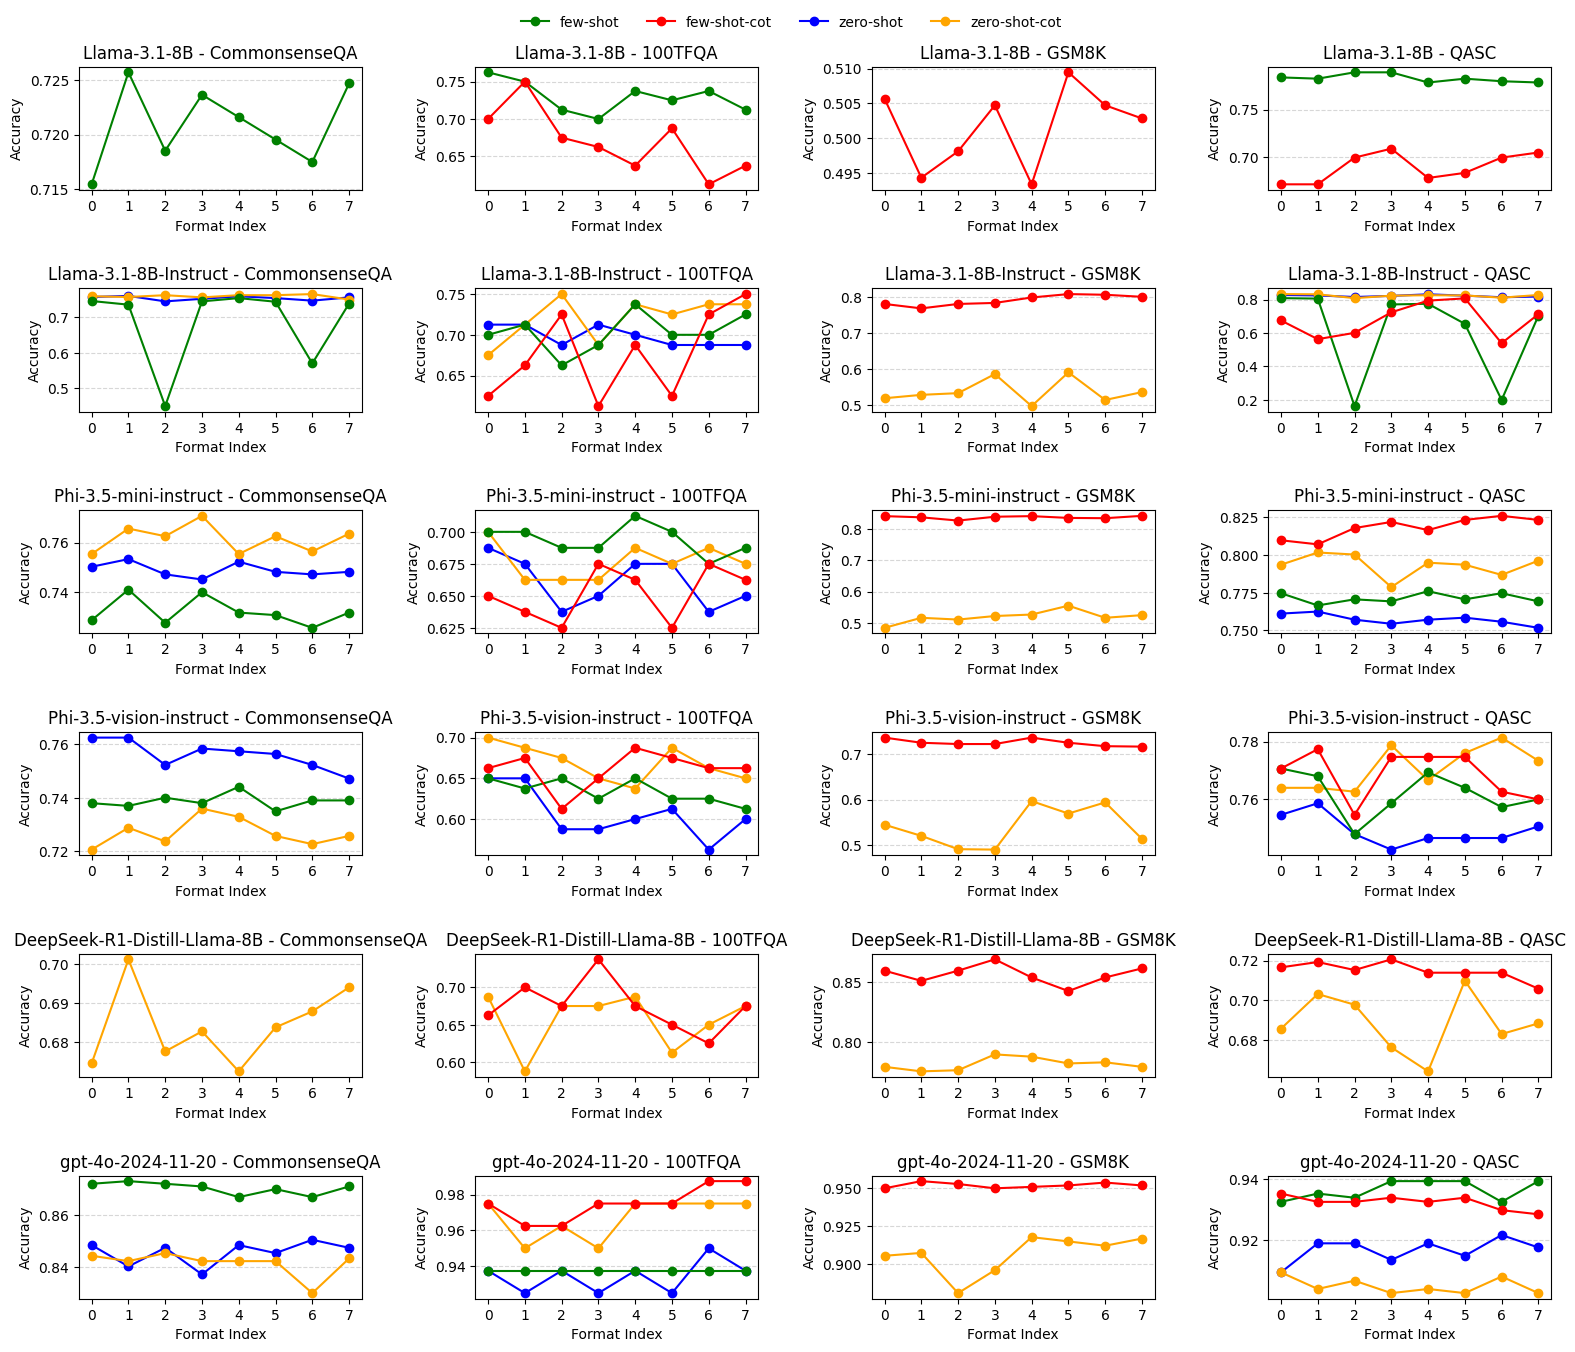

In [92]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

# 📌 전략별 고정 색상 매핑
COLOR_MAP_STRATEGY = {
    "zero-shot": "blue",
    "zero-shot-cot": "orange",
    "few-shot": "green",
    "few-shot-cot": "red",
}

def plot_all_format_results_sub(dataset_name, model_name, prompting_strategy_list, ax, sameaxis=False):
    """
    모든 prompting_strategy에 대해 각 포맷(0~7)의 Individual Format Accuracy를 그리는 함수.
    COLOR_MAP 딕셔너리를 사용하여, 동일한 전략 라벨이면 항상 같은 색을 사용.
    """
    NUM_FORMATS = 8  # 포맷 개수 (0~7)
    current_dir = os.getcwd()

    for prompting_strategy in prompting_strategy_list:
        input_path = os.path.join(
            current_dir, f"{result_dir}/{dataset_name}/{model_name}/{prompting_strategy}_score.json"
        )

        # JSON 파일 읽기
        try:
            with open(input_path) as fin:
                model_results = json.load(fin)
        except Exception as e:
            # print(f"Error loading file for {prompting_strategy}: {e}")
            continue  # 오류 발생 시 해당 전략 스킵

        # 각 포맷(0~7)의 accuracy 가져오기
        x_labels = [str(i) for i in range(NUM_FORMATS)]
        accuracy_values = [model_results["accuracy"].get(str(i), np.nan) for i in range(NUM_FORMATS)]

        # 📌 색상 매핑 (없는 경우 검정색)
        color_for_strategy = COLOR_MAP_STRATEGY.get(prompting_strategy, "black")
        
        # 📌 선 그래프 플로팅 (전략별 색상 고정)
        ax.plot(
            x_labels, 
            accuracy_values, 
            marker="o", 
            linestyle="-", 
            label=prompting_strategy,
            color=color_for_strategy
        )

    # 그래프 설정
    ax.set_xlabel("Format Index")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{model_name} - {dataset_name}")
    ax.set_xticks(range(NUM_FORMATS))
    if sameaxis:
        ax.set_ylim(0, 1)  # y축 범위를 0~1로 고정
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    

#############################################################################################

fig, axes = plt.subplots(nrows=len(model_list), ncols=len(dataset_list), figsize=(19, 16))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

for i, m_name in enumerate(model_list):
    for j, d_name in enumerate(dataset_list):
        ax = axes[i, j]
        if d_name == dataset_GSM:
            plot_all_format_results_sub(d_name, m_name, prompting_strategy_list_minimal_gsm, ax)
        else:
            plot_all_format_results_sub(d_name, m_name, prompting_strategy_list_minimal, ax)

# 📌 모든 서브플롯에서 레전드 정보 수집
handles, labels = [], []
for i in range(len(model_list)):
    for j in range(len(dataset_list)):
        h, l = axes[i, j].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

# 중복 제거
unique_legend = dict(zip(labels, handles))

#fig.legend(unique_legend.values(), unique_legend.keys(), loc="center left", bbox_to_anchor=(0.9, 0.5), ncol=1, frameon=False)
#fig.legend(unique_legend.values(), unique_legend.keys(), loc="center left", bbox_to_anchor=(0.9, 0.5), ncol=1, frameon=False)
fig.legend(unique_legend.values(), unique_legend.keys(),
           loc="upper center",
           bbox_to_anchor=(0.5, 0.92),  # x=0.5(중앙), y=0.0(아래)
           ncol=4,
           frameon=False)
plt.savefig("accuracy_all_leg-strategy.pdf")
plt.show()

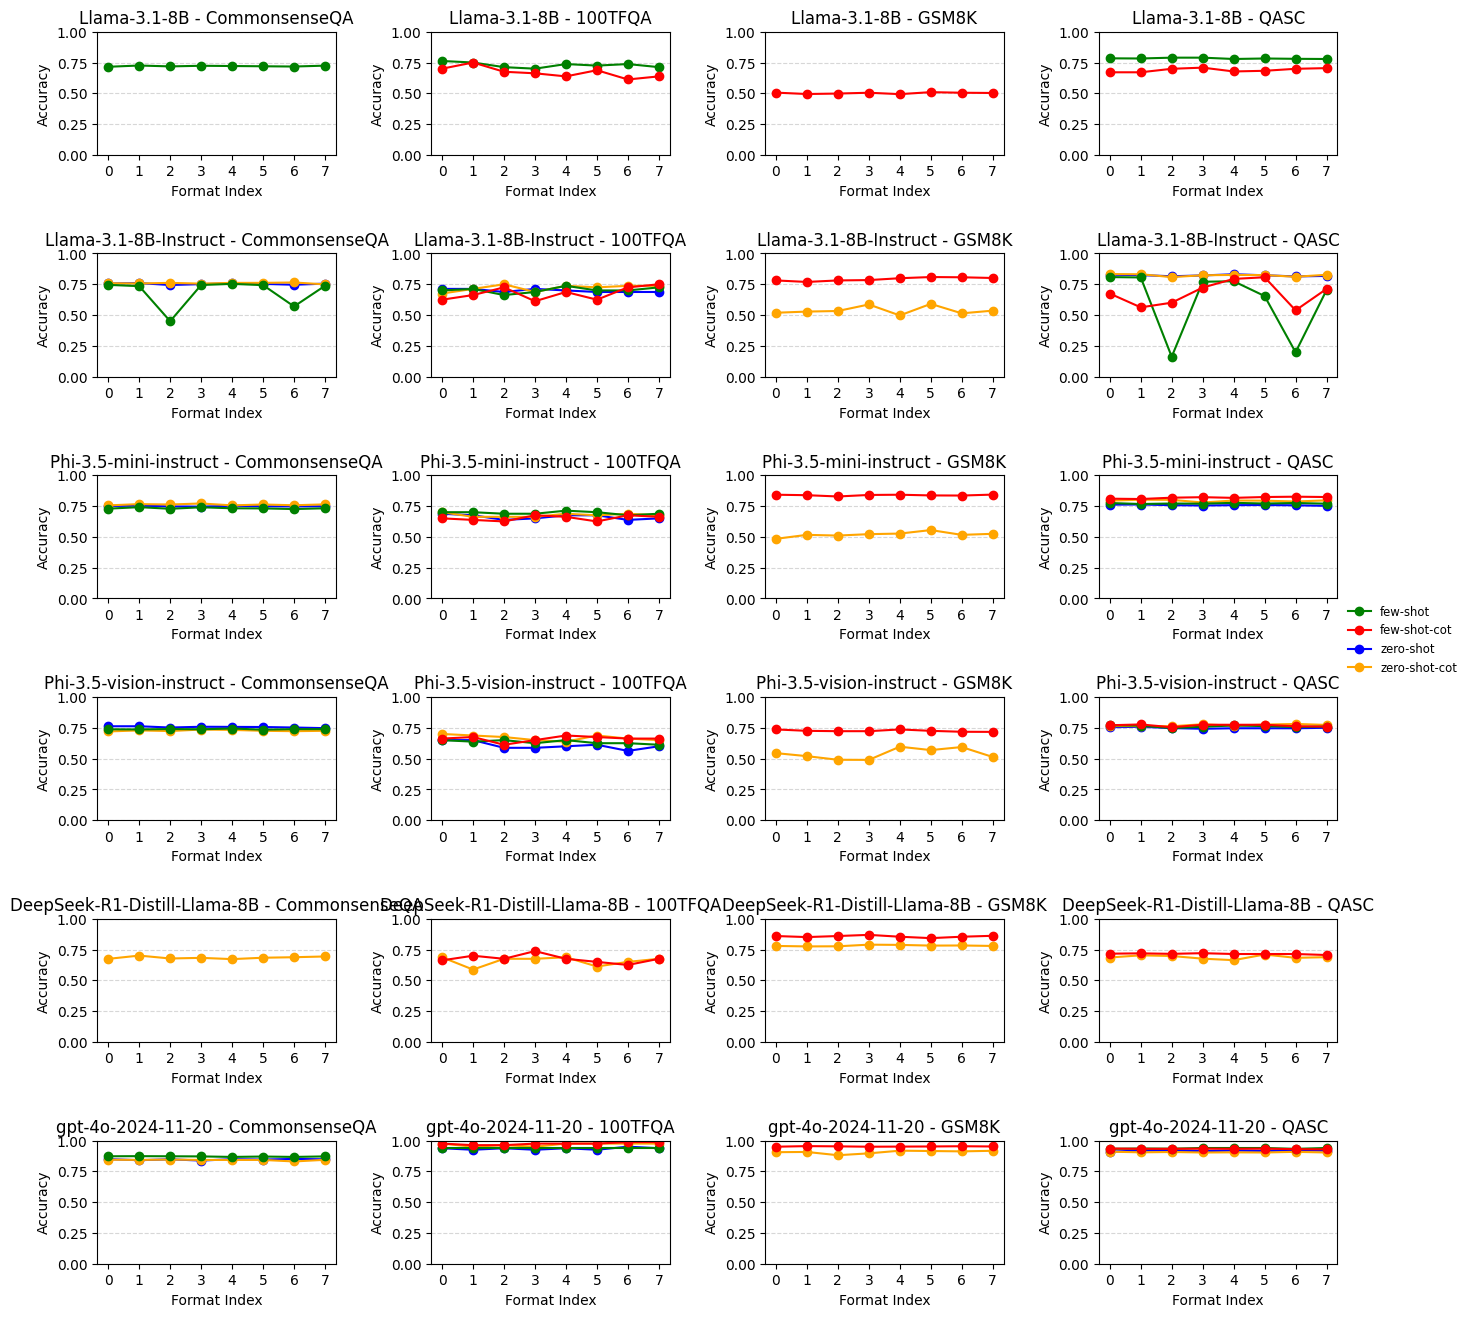

In [93]:
fig, axes = plt.subplots(nrows=len(model_list), ncols=4, figsize=(16, 16))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        ax = axes[i, j]
        if dataset_name == dataset_GSM:
            plot_all_format_results_sub(dataset_name, model_name, prompting_strategy_list_minimal_gsm, ax, sameaxis=True)
        else:
            plot_all_format_results_sub(dataset_name, model_name, prompting_strategy_list_minimal, ax, sameaxis=True)

# 📌 모든 서브플롯에서 레전드 정보 수집
handles, labels = [], []
for i in range(len(model_list)):
    for j in range(4):
        h, l = axes[i, j].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

# 중복 제거
unique_legend = dict(zip(labels, handles))

fig.legend(unique_legend.values(), unique_legend.keys(), loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize="small", ncol=1, frameon=False)
plt.show()


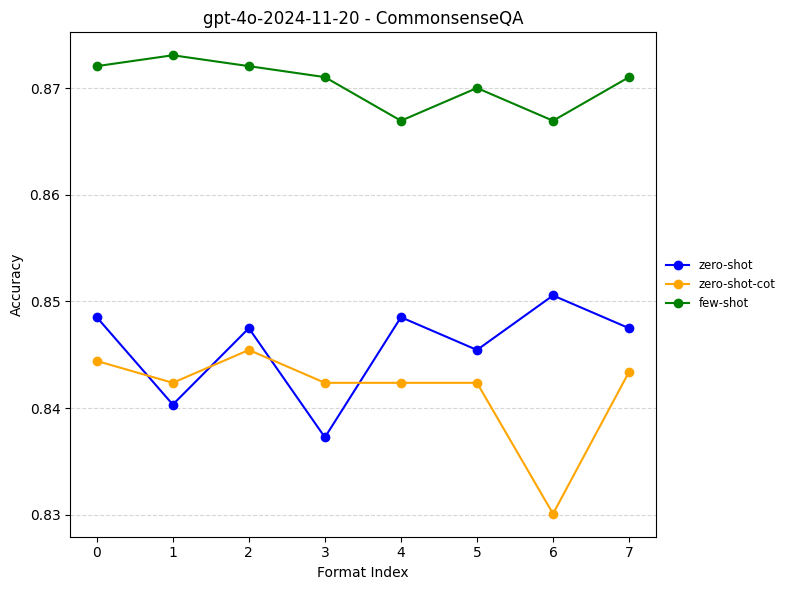

In [94]:
fig, ax = plt.subplots(figsize=(8,6))

# 4) 그래프 그리기 (single model, single dataset)
plot_all_format_results_sub(
    dataset_name=dataset_common,
    model_name=model_gpt,
    prompting_strategy_list=prompting_strategy_list_minimal,
    ax=ax,
    sameaxis=False  # y축 0~1로 고정
)

# 5) legend 표시
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels, loc="best")
# legend를 그래프 바깥에 배치
ax.legend(handles, labels,
          loc="center left",
          bbox_to_anchor=(1.0, 0.5),  # 그래프 오른쪽 중간
          fontsize="small",
          frameon=False)

# 6) 그래프 보여주기
plt.tight_layout()
plt.savefig("accuracy_gpt_common_leg-strategy.pdf")
plt.show()

## Accuracy Correlation

In [95]:
def correlation_accuracy(dataset_name, model_name, prompting_strategy_list):
    """
    특정 (dataset_name, model_name)에 대해,
    여러 prompting_strategy에서 8개 포맷의 accuracy를 로드하고,
    모든 (strategy1, strategy2) 쌍에 대해 Pearson/Spearman 상관계수를 구한 뒤,
    Kendall's W(복수 랭커 간 일치도)까지 계산하여,
    결과를 딕셔너리 형태로 리턴해주는 함수.

    - strategy가 1개 이하이면 상관계수를 계산하지 않고 None 반환.
    - 결측치(np.nan) 발견 시, 해당 strategy는 skip.
    - Pearson, Spearman 상관분포에서 평균뿐 아니라 분산/표준편차도 함께 계산.
    - Kendall's W(Kendall의 계수, Coefficient of Concordance)는 k명의 랭커가 N개 아이템에 대해 매긴 순위 일치도.
      여기서는 k = 유효한 strategy 수, N = 8 (포맷 개수).
    """

    NUM_FORMATS = 8
    current_dir = os.getcwd()

    # 전략별 accuracy 저장: data[strategy] = [acc_0, acc_1, ..., acc_7]
    data = {}

    # 1) 데이터 로드
    for prompting_strategy in prompting_strategy_list:
        input_path = os.path.join(
            current_dir,
            f"{result_dir}/{dataset_name}/{model_name}/{prompting_strategy}_score.json"
        )

        try:
            with open(input_path) as fin:
                model_results = json.load(fin)
        except Exception as e:
            # print(f"[Error]{prompting_strategy}: {e}")
            continue

        accuracy_list = []
        found_nan = False
        for i in range(NUM_FORMATS):
            val = model_results["accuracy"].get(str(i), np.nan)
            if np.isnan(val):
                print(f"[WARNING] NaN found => skip strategy: dataset={dataset_name}, "
                      f"model={model_name}, strategy={prompting_strategy}, format={i}")
                found_nan = True
                break
            accuracy_list.append(val)

        # 📌 만약 하나라도 NaN이 발견되면 이 strategy 전체 skip
        if found_nan:
            continue

        # 문제가 없으면 data에 저장
        data[prompting_strategy] = accuracy_list

    # 유효한 strategy
    strategies = list(data.keys())
    if len(strategies) < 2:
        print(f"[{dataset_name} - {model_name}] Valid strategies < 2. Skip correlation.")
        return None

    # 2) pairwise 상관관계 계산
    pearson_corrs, pearson_ps = [], []
    spearman_corrs, spearman_ps = [], []
    pairwise_results = []  # 쌍별 결과

    strategy_pairs = list(itertools.combinations(strategies, 2))
    for s1, s2 in strategy_pairs:
        X = data[s1]
        Y = data[s2]
        # Pearson
        pearson_corr, pearson_p = stats.pearsonr(X, Y)
        # Spearman
        spearman_corr, spearman_p = stats.spearmanr(X, Y)

        pearson_corrs.append(pearson_corr)
        pearson_ps.append(pearson_p)
        spearman_corrs.append(spearman_corr)
        spearman_ps.append(spearman_p)

        pairwise_results.append({
            "pair": (s1, s2),
            "pearson_corr": pearson_corr,
            "pearson_p": pearson_p,
            "spearman_corr": spearman_corr,
            "spearman_p": spearman_p
        })

    # 3) 통계량(평균, 분산, 표준편차, 최소, 최대) 계산
    # Pearson
    pearson_mean = np.nanmean(pearson_corrs)
    pearson_var = np.nanvar(pearson_corrs)
    pearson_std = np.nanstd(pearson_corrs)
    pearson_min_idx = np.nanargmin(pearson_corrs)
    pearson_max_idx = np.nanargmax(pearson_corrs)

    # Spearman
    spearman_mean = np.nanmean(spearman_corrs)
    spearman_var = np.nanvar(spearman_corrs)
    spearman_std = np.nanstd(spearman_corrs)
    spearman_min_idx = np.nanargmin(spearman_corrs)
    spearman_max_idx = np.nanargmax(spearman_corrs)

    # 4) Kendall's W 계산
    #    k = # of strategies, N = # of items(=8)
    #    data_matrix: shape(k, N)
    #    row = strategy, col = format idx

    # strategies 순서대로 data_matrix 구성
    data_matrix = []
    for s in strategies:
        data_matrix.append(data[s])
    data_matrix = np.array(data_matrix)  # shape(k, 8)

    # 1) 각 행(row=strategy)에 대해 정렬 인덱스로 순위화
    #    np.argsort(...) -> 0-based rank
    #    +1 하여 1-based rank로 만듦
    ranked_data = np.argsort(np.argsort(data_matrix, axis=1), axis=1) + 1  # shape(k, N)

    # 2) Sum of ranks per item
    R = np.sum(ranked_data, axis=0)  # shape(N, ), 각 format별 rank합

    # 3) S = Σ (R_j - mean(R))^2
    R_mean = np.mean(R)
    S = np.sum((R - R_mean)**2)

    # 4) formula: W = [12 * S] / [k^2 * (N^3 - N)]
    k = ranked_data.shape[0]
    N = ranked_data.shape[1]

    if N < 2 or k < 2:
        kendalls_w = np.nan
    else:
        kendalls_w = (12 * S) / (k**2 * (N**3 - N))

    summary = {
        # Pearson
        "pearson_mean": pearson_mean,
        "pearson_var": pearson_var,
        "pearson_std": pearson_std,
        "pearson_min": (pearson_corrs[pearson_min_idx], pearson_ps[pearson_min_idx]),
        "pearson_max": (pearson_corrs[pearson_max_idx], pearson_ps[pearson_max_idx]),

        # Spearman
        "spearman_mean": spearman_mean,
        "spearman_var": spearman_var,
        "spearman_std": spearman_std,
        "spearman_min": (spearman_corrs[spearman_min_idx], spearman_ps[spearman_min_idx]),
        "spearman_max": (spearman_corrs[spearman_max_idx], spearman_ps[spearman_max_idx]),

        # Kendall's W
        "kendalls_w": kendalls_w
    }

    # 리턴용 딕셔너리 구성
    results_dict = {
        "dataset": dataset_name,
        "model": model_name,
        "strategies": strategies,
        "pairwise_results": pairwise_results,
        "summary": summary
    }

    return results_dict

In [96]:
import scipy.stats as stats
import numpy as np
import itertools

for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        if dataset_name == dataset_GSM:
            results = correlation_accuracy(dataset_name, model_name, prompting_strategy_list_minimal_gsm)
        else:
            results = correlation_accuracy(dataset_name, model_name, prompting_strategy_list_minimal)

    
    if results is not None:
        print(f"===== {model_name} - {dataset_name} =====")
        for item in results["pairwise_results"]:
            s1, s2 = item["pair"]
            print(f"Strategies: ({s1}, {s2})")
            print(f"  Pearson:  r={item['pearson_corr']:.4f}, p={item['pearson_p']:.4f}")
            print(f"  Spearman: r={item['spearman_corr']:.4f}, p={item['spearman_p']:.4f}")
            print()

        print("===== Summary =====")
        summary = results["summary"]
        print(f"Pearson mean = {summary['pearson_mean']:.4f}")
        print(f"Pearson var = {summary['pearson_var']:.4f}")
        print(f"Pearson std = {summary['pearson_std']:.4f}")
        print(f"Pearson min  = {summary['pearson_min'][0]:.4f} (p={summary['pearson_min'][1]:.4f})")
        print(f"Pearson max  = {summary['pearson_max'][0]:.4f} (p={summary['pearson_max'][1]:.4f})\n")

        print(f"Spearman mean = {summary['spearman_mean']:.4f}")
        print(f"Spearman var  = {summary['spearman_var']:.4f}")
        print(f"Spearman std  = {summary['spearman_std']:.4f}")
        print(f"Spearman min  = {summary['spearman_min'][0]:.4f} (p={summary['spearman_min'][1]:.4f})")
        print(f"Spearman max  = {summary['spearman_max'][0]:.4f} (p={summary['spearman_max'][1]:.4f})\n")

        print(f"Kendall's W = {summary['kendalls_w']:.4f}")

        print("Done.")
    else:
        print("No correlation computed.")


[CommonsenseQA - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
[GSM8K - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
===== Llama-3.1-8B - QASC =====
Strategies: (few-shot, few-shot-cot)
  Pearson:  r=0.2815, p=0.4995
  Spearman: r=0.1104, p=0.7946

===== Summary =====
Pearson mean = 0.2815
Pearson var = 0.0000
Pearson std = 0.0000
Pearson min  = 0.2815 (p=0.4995)
Pearson max  = 0.2815 (p=0.4995)

Spearman mean = 0.1104
Spearman var  = 0.0000
Spearman std  = 0.0000
Spearman min  = 0.1104 (p=0.7946)
Spearman max  = 0.1104 (p=0.7946)

Kendall's W = 0.5476
Done.
===== Llama-3.1-8B-Instruct - QASC =====
Strategies: (zero-shot, zero-shot-cot)
  Pearson:  r=0.7551, p=0.0303
  Spearman: r=0.7143, p=0.0465

Strategies: (zero-shot, few-shot)
  Pearson:  r=0.8050, p=0.0159
  Spearman: r=0.8333, p=0.0102

Strategies: (zero-shot, few-shot-cot)
  Pearson:  r=0.5716, p=0.1388
  Spearman: r=0.4762, p=0.2329

Strategies: (zero-shot-cot, few-shot)
  Pearson:  r=0.9552, p=0.0002
  Spearm

/tmp/ipykernel_1250/2353714291.py:70: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = stats.pearsonr(X, Y)
/tmp/ipykernel_1250/2353714291.py:72: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p = stats.spearmanr(X, Y)


In [97]:
summary_rows = []

for model_name in model_list:
    for dataset_name in dataset_list:
        if dataset_name == dataset_GSM:
            results = correlation_accuracy(dataset_name, model_name, prompting_strategy_list_minimal_gsm)
        else:
            results = correlation_accuracy(dataset_name, model_name, prompting_strategy_list_minimal)

        if results is not None:
            summ = results["summary"]
            summary_rows.append({
                "model": model_name,
                "dataset": dataset_name,
                "pearson_mean": summ["pearson_mean"],
                "pearson_var": summ["pearson_var"],
                "pearson_std": summ["pearson_std"],
                "pearson_min": summ["pearson_min"],
                "pearson_max": summ["pearson_max"],
                "spearman_mean": summ["spearman_mean"],
                "spearman_var": summ["spearman_var"],
                "spearman_std": summ["spearman_std"],
                "spearman_min": summ["spearman_min"],
                "spearman_max": summ["spearman_max"],
                "kendalls_w": summ["kendalls_w"]
            })

[CommonsenseQA - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
[GSM8K - Llama-3.1-8B] Valid strategies < 2. Skip correlation.


[CommonsenseQA - DeepSeek-R1-Distill-Llama-8B] Valid strategies < 2. Skip correlation.


/tmp/ipykernel_1250/2353714291.py:70: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = stats.pearsonr(X, Y)
/tmp/ipykernel_1250/2353714291.py:72: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p = stats.spearmanr(X, Y)


In [98]:
print(r"\begin{table}[ht]")
print(r"\centering")
print(r"\begin{tabular}{llrrrrrrr}")
print(r"\toprule")
print(r"Model & Dataset & \multicolumn{3}{c}{Pearson} & \multicolumn{3}{c}{Spearman} & \multicolumn{1}{c}{Kendall's W} \\")
print(r" & & Mean & Var(Std) & (Min,Max) & Mean & Var(Std) & (Min,Max) & Value \\")
print(r"\midrule")

for row in summary_rows:
    model_name = row["model"]
    dataset_name = row["dataset"]
    
    pearson_mean = row["pearson_mean"]
    pearson_var = row["pearson_var"]
    pearson_std = row["pearson_std"]
    pm_corr_min, pm_p_min = row["pearson_min"]
    pm_corr_max, pm_p_max = row["pearson_max"]

    spearman_mean = row["spearman_mean"]
    spearman_var = row["spearman_var"]
    spearman_std = row["spearman_std"]
    sm_corr_min, sm_p_min = row["spearman_min"]
    sm_corr_max, sm_p_max = row["spearman_max"]

    # Kendall's W
    kendalls_w = row["kendalls_w"]

    line = (
        f"{model_name} & {dataset_name} & "
        f"{pearson_mean:.3f} & "
        f"{pearson_var:.3f}({pearson_std:.3f}) & "
        f"({pm_corr_min:.3f},{pm_corr_max:.3f}) & "
        f"{spearman_mean:.3f} & "
        f"{spearman_var:.3f}({spearman_std:.3f}) & "
        f"({sm_corr_min:.3f},{sm_corr_max:.3f}) & "
        f"{kendalls_w:.3f} "
        r"\\"
    )
    print(line)

print(r"\bottomrule")
print(r"\end{tabular}")
print(r"\caption{Pairwise correlation summary among strategies (Pearson, Spearman, and Kendall's W).}")
print(r"\label{tab:correlation-summary}")
print(r"\end{table}")


\begin{table}[ht]
\centering
\begin{tabular}{llrrrrrrr}
\toprule
Model & Dataset & \multicolumn{3}{c}{Pearson} & \multicolumn{3}{c}{Spearman} & \multicolumn{1}{c}{Kendall's W} \\
 & & Mean & Var(Std) & (Min,Max) & Mean & Var(Std) & (Min,Max) & Value \\
\midrule
Llama-3.1-8B & 100TFQA & 0.395 & 0.000(0.000) & (0.395,0.395) & 0.388 & 0.000(0.000) & (0.388,0.388) & 0.655 \\
Llama-3.1-8B & QASC & 0.281 & 0.000(0.000) & (0.281,0.281) & 0.110 & 0.000(0.000) & (0.110,0.110) & 0.548 \\
Llama-3.1-8B-Instruct & CommonsenseQA & -0.012 & 0.388(0.623) & (-0.474,0.868) & -0.013 & 0.161(0.401) & (-0.366,0.548) & 0.365 \\
Llama-3.1-8B-Instruct & 100TFQA & -0.069 & 0.301(0.548) & (-0.836,0.808) & -0.040 & 0.313(0.560) & (-0.802,0.827) & 0.256 \\
Llama-3.1-8B-Instruct & GSM8K & 0.093 & 0.000(0.000) & (0.093,0.093) & 0.216 & 0.000(0.000) & (0.216,0.216) & 0.619 \\
Llama-3.1-8B-Instruct & QASC & 0.671 & 0.034(0.185) & (0.399,0.955) & 0.520 & 0.102(0.319) & (0.095,0.881) & 0.640 \\
Phi-3.5-mini-instruct & 

### [ 논문 제출용 - Accuracy Correlation latex - spearman ]

In [99]:
print(r"\begin{table}[ht]")
print(r"\centering")
print(r"\begin{tabular}{llrrrrrrr}")
print(r"\toprule")
print(r"Model & Dataset & \multicolumn{3}{c}{Spearman}  \\")
print(r" & & Mean & Var & (Min,Max) \\")
print(r"\midrule")

for row in summary_rows:
    model_name = row["model"]
    dataset_name = row["dataset"]
    
    spearman_mean = row["spearman_mean"]
    spearman_var = row["spearman_var"]
    sm_corr_min, sm_p_min = row["spearman_min"]
    sm_corr_max, sm_p_max = row["spearman_max"]

    
    line = (
        f"{model_name} & {dataset_name} & "
        f"{spearman_mean:.3f} & "
        f"{spearman_var:.3f} & "
        f"({sm_corr_min:.3f},{sm_corr_max:.3f}) "
        r"\\"
    )
    print(line)

print(r"\bottomrule")
print(r"\end{tabular}")
print(r"\caption{Pairwise Pearson correlation among strategies}")
print(r"\label{tab:correlation-summary}")
print(r"\end{table}")


\begin{table}[ht]
\centering
\begin{tabular}{llrrrrrrr}
\toprule
Model & Dataset & \multicolumn{3}{c}{Spearman}  \\
 & & Mean & Var & (Min,Max) \\
\midrule
Llama-3.1-8B & 100TFQA & 0.388 & 0.000 & (0.388,0.388) \\
Llama-3.1-8B & QASC & 0.110 & 0.000 & (0.110,0.110) \\
Llama-3.1-8B-Instruct & CommonsenseQA & -0.013 & 0.161 & (-0.366,0.548) \\
Llama-3.1-8B-Instruct & 100TFQA & -0.040 & 0.313 & (-0.802,0.827) \\
Llama-3.1-8B-Instruct & GSM8K & 0.216 & 0.000 & (0.216,0.216) \\
Llama-3.1-8B-Instruct & QASC & 0.520 & 0.102 & (0.095,0.881) \\
Phi-3.5-mini-instruct & CommonsenseQA & 0.234 & 0.155 & (-0.305,0.624) \\
Phi-3.5-mini-instruct & 100TFQA & 0.176 & 0.178 & (-0.408,0.857) \\
Phi-3.5-mini-instruct & GSM8K & 0.241 & 0.000 & (0.241,0.241) \\
Phi-3.5-mini-instruct & QASC & -0.171 & 0.139 & (-0.699,0.373) \\
Phi-3.5-vision-instruct & CommonsenseQA & -0.096 & 0.077 & (-0.463,0.206) \\
Phi-3.5-vision-instruct & 100TFQA & 0.279 & 0.051 & (-0.037,0.595) \\
Phi-3.5-vision-instruct & GSM8K & 0.43

### [ 논문 제출용 - Correlation text - spearman ]

In [100]:
print( "Model,Dataset,Mean,Var,Min,Max")

for row in summary_rows:
    model_name = row["model"]
    dataset_name = row["dataset"]
    
    spearman_mean = row["spearman_mean"]
    spearman_var = row["spearman_var"]
    sm_corr_min, sm_p_min = row["spearman_min"]
    sm_corr_max, sm_p_max = row["spearman_max"]

    
    line = (
        f"{model_name},{dataset_name},{spearman_mean:.3f},{spearman_var:.3f},{sm_corr_min:.3f},{sm_corr_max:.3f}"
    )
    print(line)


Model,Dataset,Mean,Var,Min,Max
Llama-3.1-8B,100TFQA,0.388,0.000,0.388,0.388
Llama-3.1-8B,QASC,0.110,0.000,0.110,0.110
Llama-3.1-8B-Instruct,CommonsenseQA,-0.013,0.161,-0.366,0.548
Llama-3.1-8B-Instruct,100TFQA,-0.040,0.313,-0.802,0.827
Llama-3.1-8B-Instruct,GSM8K,0.216,0.000,0.216,0.216
Llama-3.1-8B-Instruct,QASC,0.520,0.102,0.095,0.881
Phi-3.5-mini-instruct,CommonsenseQA,0.234,0.155,-0.305,0.624
Phi-3.5-mini-instruct,100TFQA,0.176,0.178,-0.408,0.857
Phi-3.5-mini-instruct,GSM8K,0.241,0.000,0.241,0.241
Phi-3.5-mini-instruct,QASC,-0.171,0.139,-0.699,0.373
Phi-3.5-vision-instruct,CommonsenseQA,-0.096,0.077,-0.463,0.206
Phi-3.5-vision-instruct,100TFQA,0.279,0.051,-0.037,0.595
Phi-3.5-vision-instruct,GSM8K,0.436,0.000,0.436,0.436
Phi-3.5-vision-instruct,QASC,0.010,0.174,-0.700,0.561
DeepSeek-R1-Distill-Llama-8B,100TFQA,0.050,0.000,0.050,0.050
DeepSeek-R1-Distill-Llama-8B,GSM8K,0.224,0.000,0.224,0.224
DeepSeek-R1-Distill-Llama-8B,QASC,-0.049,0.000,-0.049,-0.049
gpt-4o-2024-11-20,CommonsenseQ

In [101]:
import matplotlib.pyplot as plt
import numpy as np

######################################
# 1) correlation_accuracy 결과를
#    막대그래프로 요약 표시하는 함수
######################################
def plot_correlation_summary_ax(ax, results):
    """
    correlation_accuracy()의 결과 `results`를 받아,
    (Pearson, Spearman, Kendall's W)를 막대그래프로 서브플롯(ax)에 그리는 함수.
    """

    summary = results["summary"]

    # Pearson
    p_mean = summary["pearson_mean"]
    p_std  = summary["pearson_std"]

    # Spearman
    s_mean = summary["spearman_mean"]
    s_std  = summary["spearman_std"]

    # Kendall's W (단일 값)
    k_w = summary["kendalls_w"]

    # x축 항목: "Pearson", "Spearman", "KendallW"
    x_labels = ["Pearson", "Spearman", "KendallW"]
    means = [p_mean, s_mean, k_w]
    # Pearson/Spearman은 std가 있지만, Kendall's W는 단일값이므로 std=0
    stds  = [p_std, s_std, 0.0]

    x_pos = np.arange(len(x_labels))  # [0,1,2]

    ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.7, capsize=8)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels, fontsize=9)
    ax.set_ylim(-1, 1.05)  # 상관계수(-1~1), Kendall's W(0~1) 고려
    ax.set_ylabel("Correlation / W", fontsize=8)

    # 그래프 상단에 값 표시(옵션)
    for i, v in enumerate(means):
        ax.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=8)

    # 서브플롯 제목
    ds = results["dataset"]
    md = results["model"]
    ax.set_title(f"{md}\n{ds}", fontsize=10)

######################################
# 2) (모델 × 데이터셋) 전체를
#    한 번에 그리는 메인 코드 예시
######################################
def plot_all_correlations(model_list, dataset_list,
                          prompting_strategy_list_minimal,
                          prompting_strategy_list_minimal_gsm, is_consistancy=False):
    """
    모든 모델, 데이터셋 조합에 대해 correlation_accuracy를 호출하고,
    (Pearson, Spearman, Kendall's W)를 서브플롯(grid)으로 그려 한 번에 표시.
    """

    # 서브플롯 크기 설정: rows = len(model_list), cols = len(dataset_list)
    nrows = len(model_list)
    ncols = len(dataset_list)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3.5*nrows))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    # axes가 2차원 배열 형태가 되므로, 루프를 돌면서 각각 할당
    for i, model_name in enumerate(model_list):
        for j, dataset_name in enumerate(dataset_list):
            # 어떤 Strategy list 쓸지 결정 (예: GSM8K에는 별도 minimal_gsm)
            if dataset_name == "GSM8K":
                used_strategies = prompting_strategy_list_minimal_gsm
            else:
                used_strategies = prompting_strategy_list_minimal

            ax = axes[i, j] if nrows > 1 else axes[j]  # 행렬/1차원 구분

            if is_consistancy:
                results = correlation_consistency(dataset_name, model_name, used_strategies)
            else: 
                # correlation_accuracy 호출
                results = correlation_accuracy(dataset_name, model_name, used_strategies)

            if (results is not None):
                # 막대그래프(요약) 그리기
                plot_correlation_summary_ax(ax, results)
            else:
                # 유효한 전략이 없거나 <2개인 경우
                ax.set_title(f"{model_name}\n{dataset_name}\nNo Correlation", fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])

    if is_consistancy:
        fig.suptitle("Consistency Strategy Correlation", fontsize=16)
    else:
        fig.suptitle("Accuracy Strategy Correlation", fontsize=16)


    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


[CommonsenseQA - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
[GSM8K - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
[CommonsenseQA - DeepSeek-R1-Distill-Llama-8B] Valid strategies < 2. Skip correlation.


/tmp/ipykernel_1250/2353714291.py:70: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = stats.pearsonr(X, Y)
/tmp/ipykernel_1250/2353714291.py:72: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p = stats.spearmanr(X, Y)


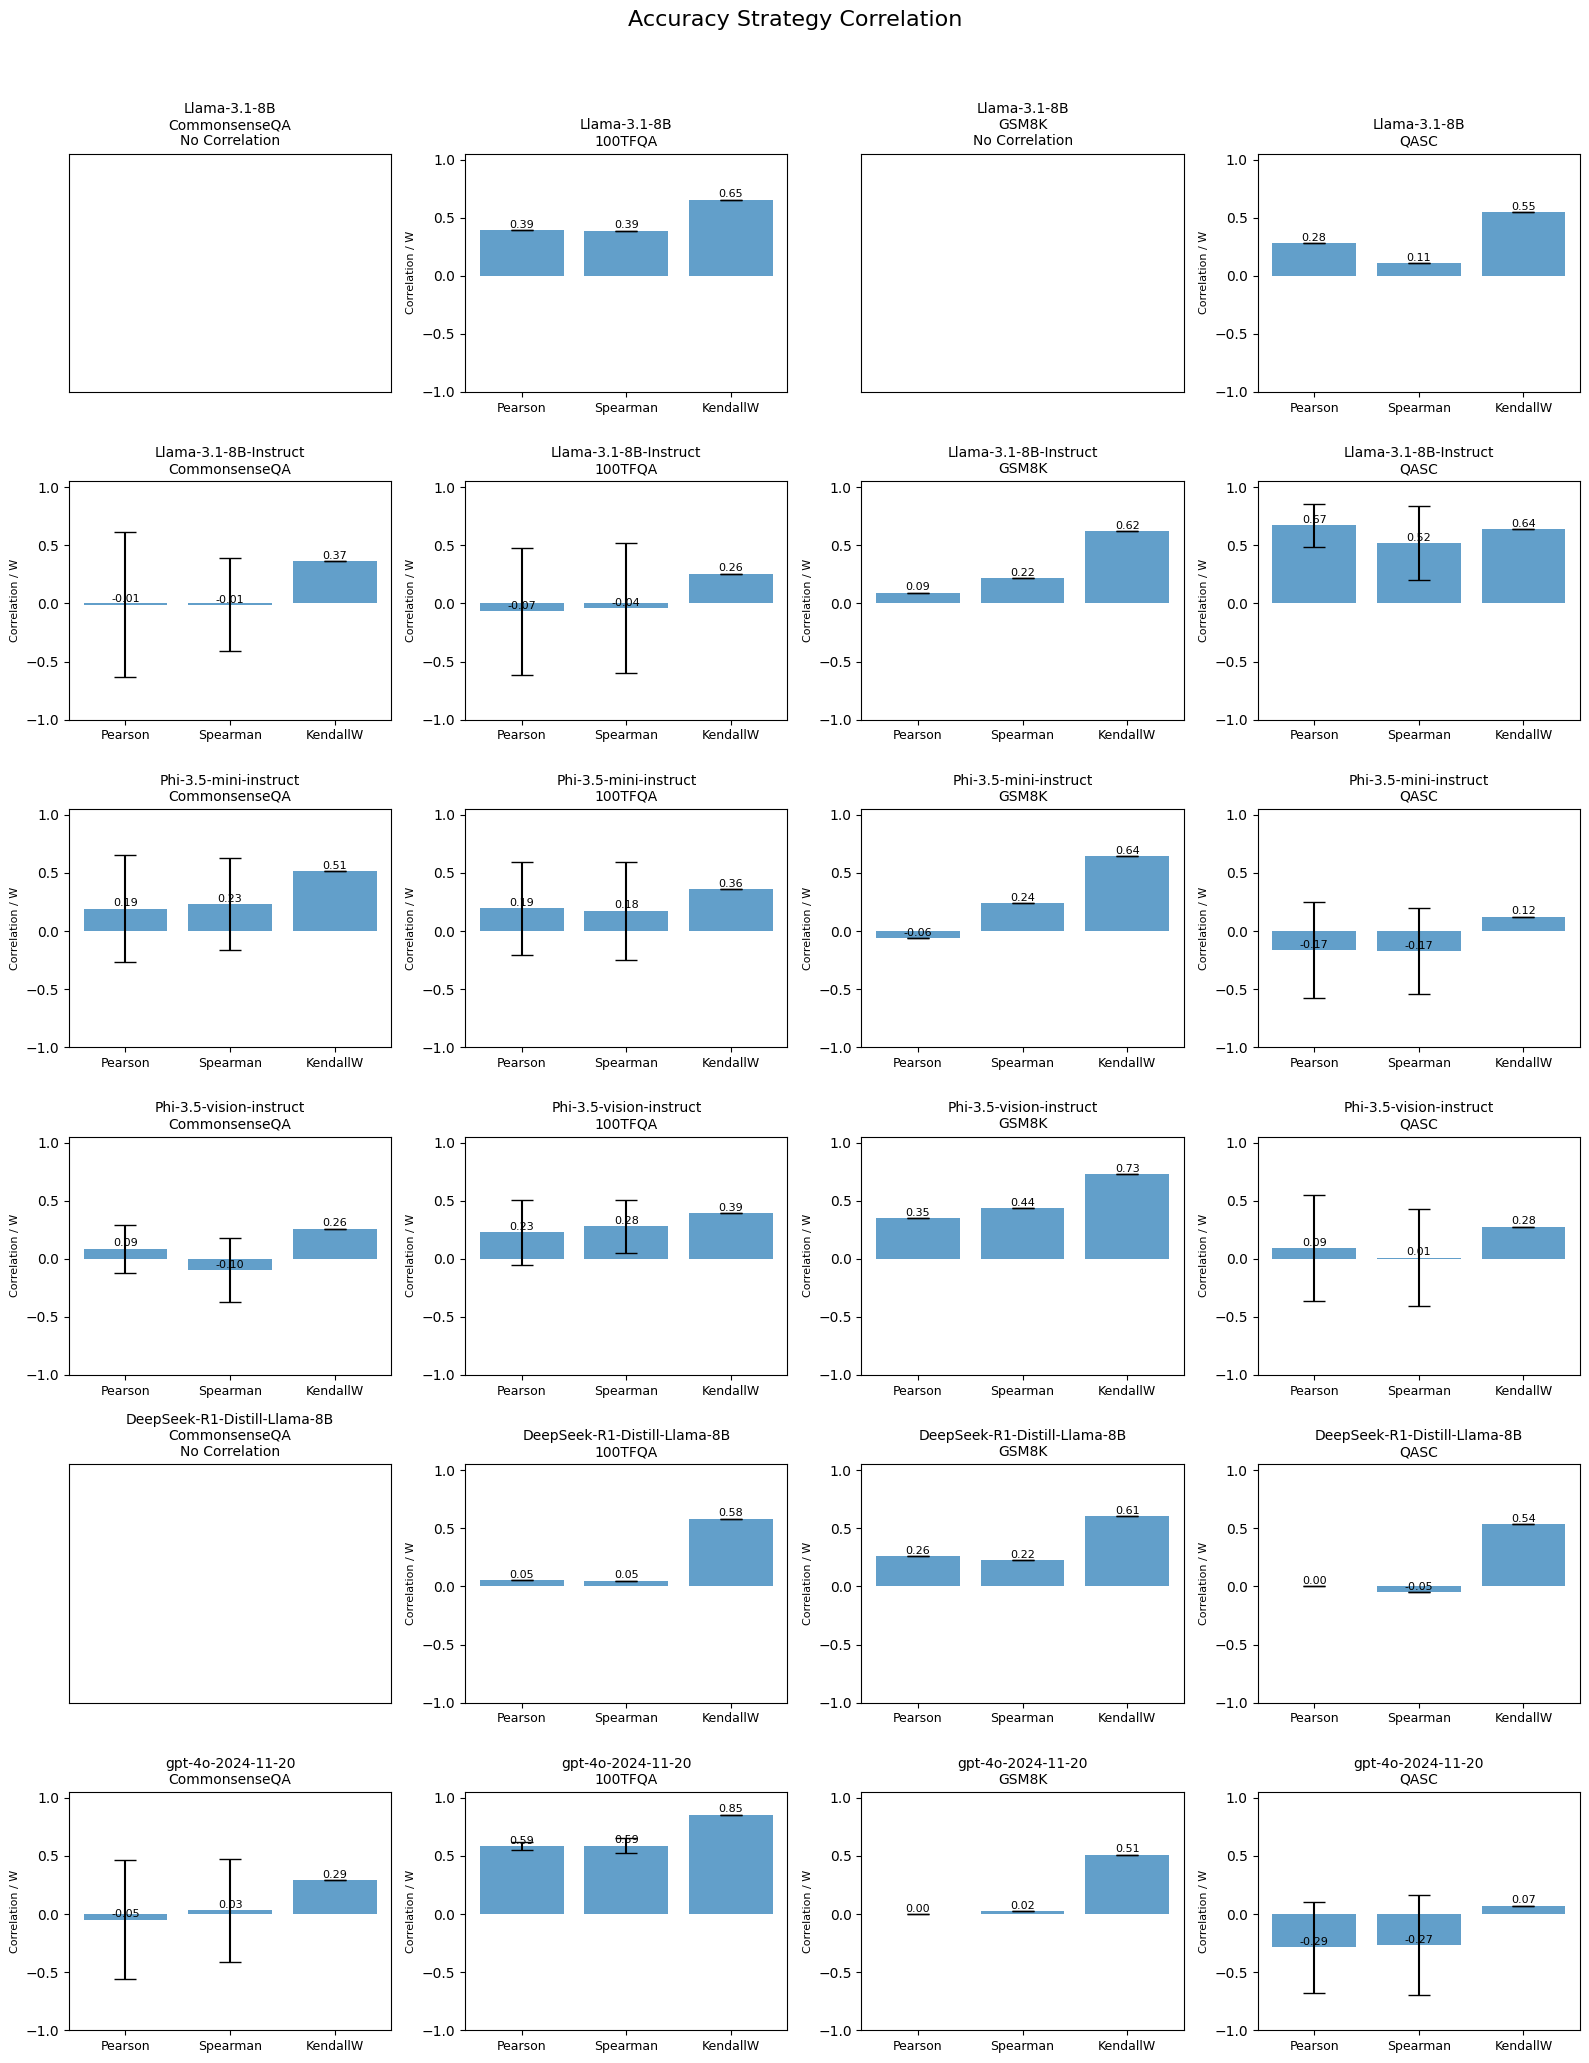

In [102]:

prompting_strategy_list_minimal = ["zero-shot", "zero-shot-cot", "few-shot", "few-shot-cot"]
prompting_strategy_list_minimal_gsm = ["zero-shot-cot", "few-shot-cot"]

# 메인 함수 실행
plot_all_correlations(
    model_list,
    dataset_list,
    prompting_strategy_list_minimal,
    prompting_strategy_list_minimal_gsm
)

### [ 논문 제출용(appendix) - Accuracy Trends across Prompting Strategies ]

* Phi-mini VS gpt
    - CommonQA, 100TF, QASC : 전략에 따라 정확도가 반전됨
* Phi-mini VS Phi-vision 
    - CommonQA : 전략에 따라 정확도가 반전됨

* llama-instruct
    - CommonQA, QASC : few-shot 에서 [2][6] 에서 성능이 급감

* GSM
    - few-shot 이 모든 경우에 우위


/tmp/ipykernel_1250/4196437651.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Accent")
/tmp/ipykernel_1250/4196437651.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=xlabel_rotation)  # 가독성을 위해 x축 레이블 회전
/tmp/ipykernel_1250/4196437651.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Accent")
/tmp/ipykernel_1250/4196437651.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

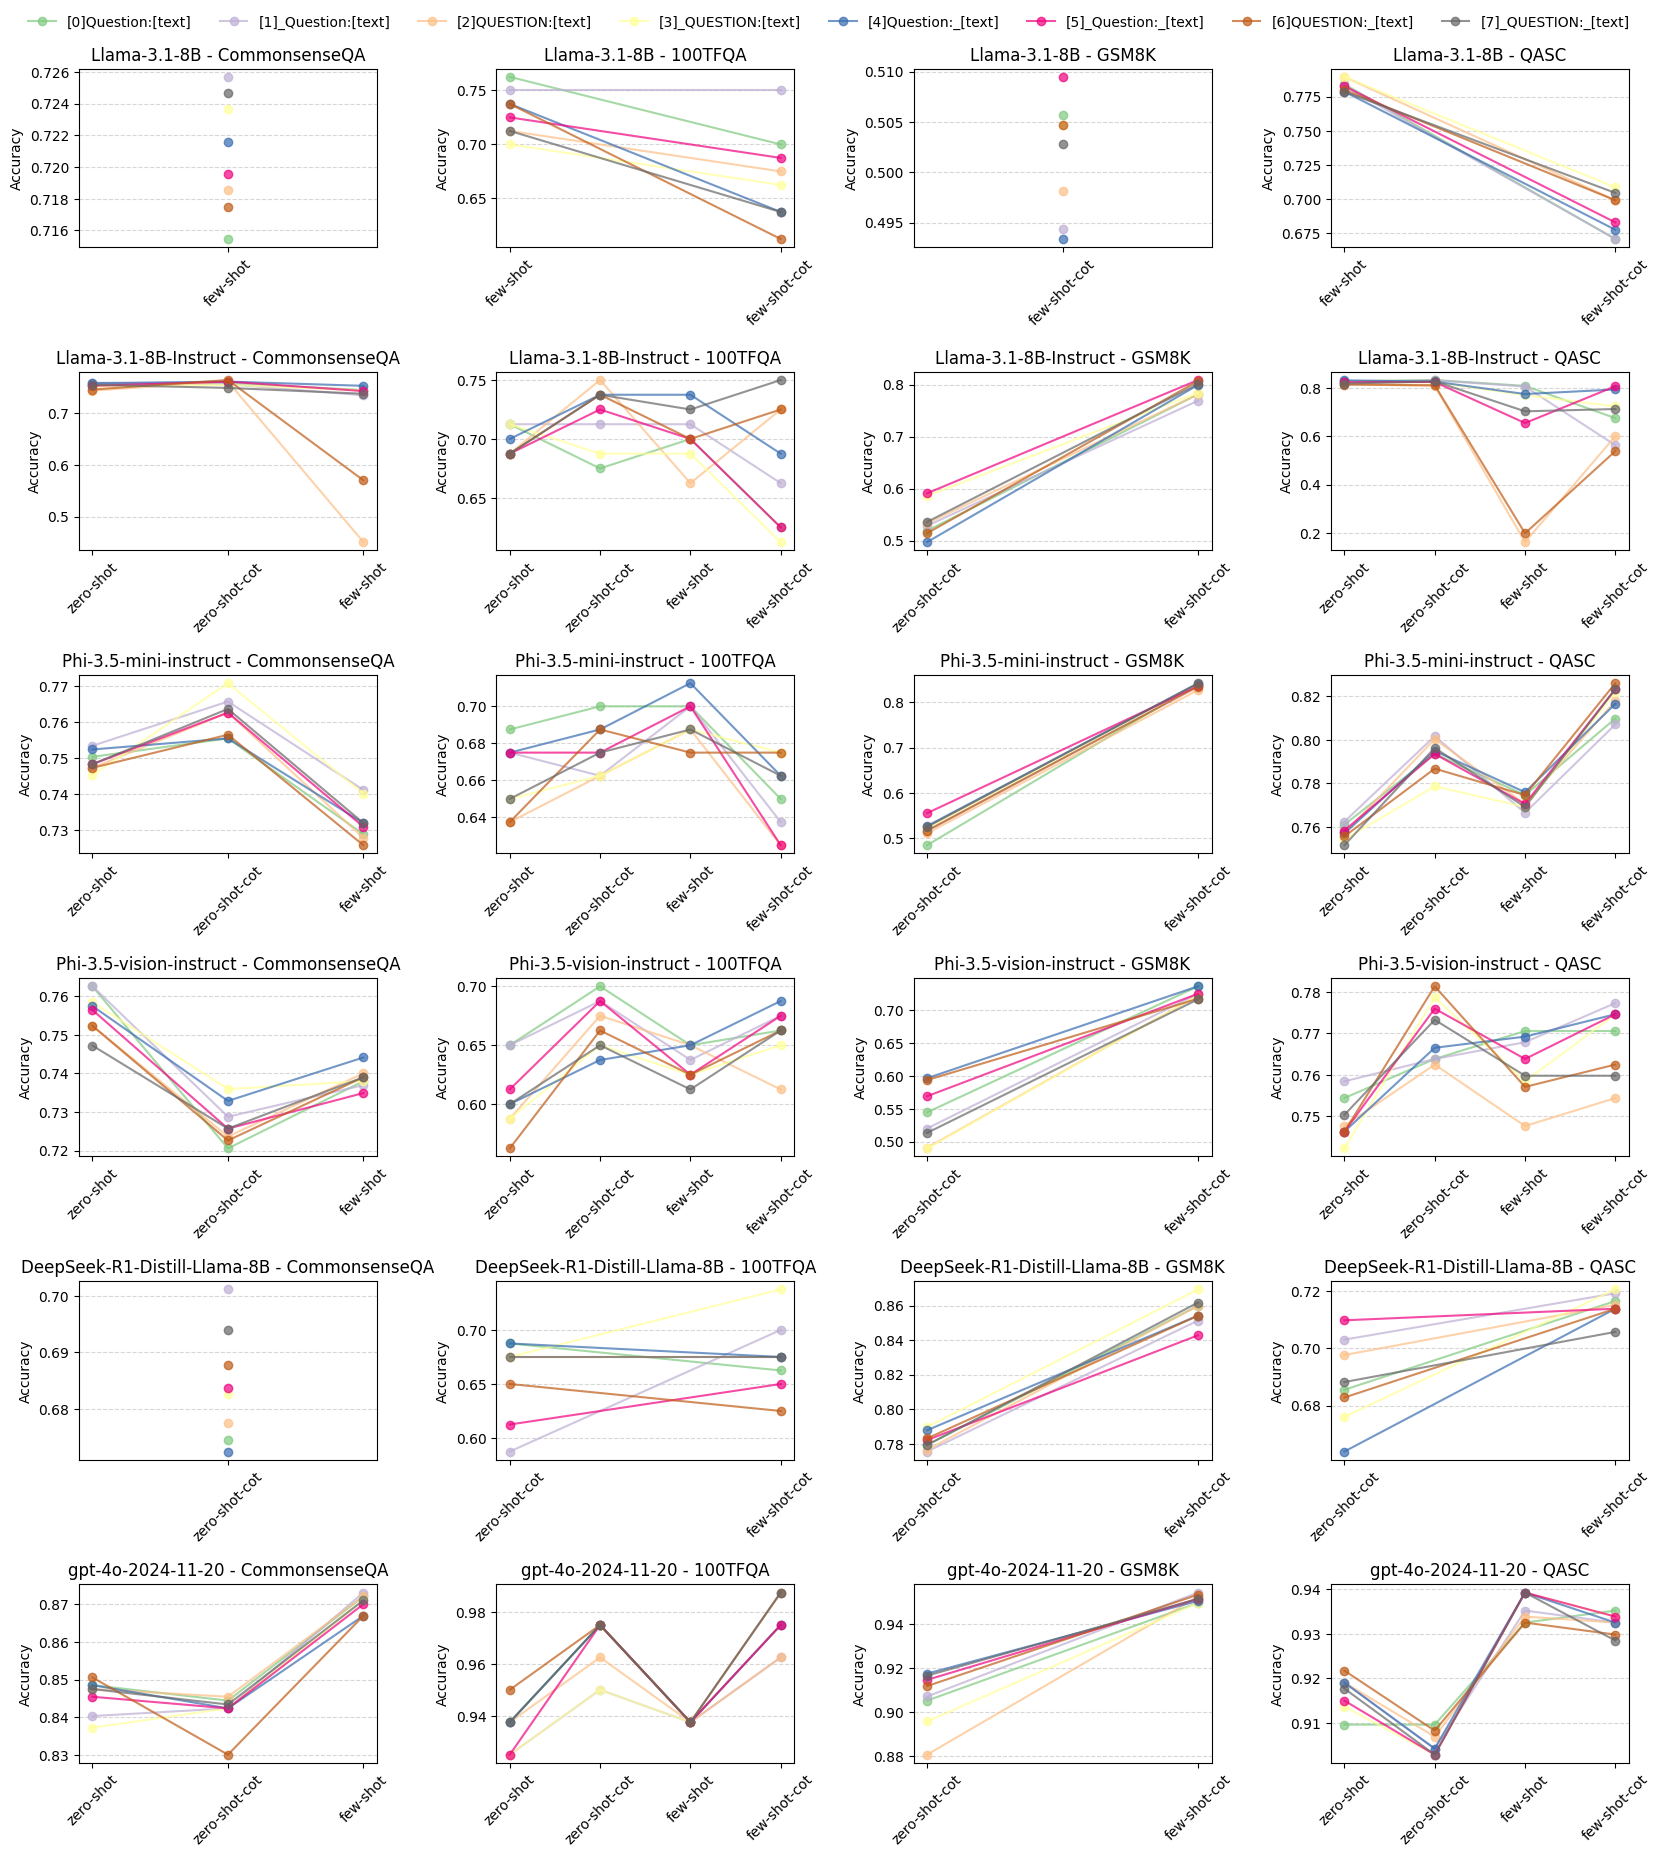

In [103]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import matplotlib


def plot_format_vs_strategy_sub(dataset_name, model_name, prompting_strategy_list, ax, sameaxis=False, title=None, xlabel_rotation=45):
    """
    모든 format index에 대해 (y축: Accuracy) vs (x축: 유효한 prompting_strategy) 그래프를 그리는 함수.
    format index마다 고정 색상을 사용하여, 같은 포맷은 모든 서브플롯에서 동일한 색상으로 보이도록 함.
    """
    NUM_FORMATS = 8  # 포맷 개수 (0~7)
    current_dir = os.getcwd()

    format_labels = {
        "0": "[0]Question:[text]",
        "1": "[1]_Question:[text]",
        "2": "[2]QUESTION:[text]",
        "3": "[3]_QUESTION:[text]",
        "4": "[4]Question:_[text]",
        "5": "[5]_Question:_[text]",
        "6": "[6]QUESTION:_[text]",
        "7": "[7]_QUESTION:_[text]"
    }


    cmap = matplotlib.cm.get_cmap("Accent")
    # NUM_FORMATS개 색상을 가져옴
    base_colors = [cmap(i / (NUM_FORMATS - 1)) for i in range(NUM_FORMATS)]
    # alpha=0.7로 고정
    format_colors = []
    for color in base_colors:
        # color는 RGBA 튜플 (r, g, b, a)
        # alpha를 0.7로 덮어씌움
        r, g, b, _ = color
        format_colors.append((r, g, b, 0.7))

    # format 별로 accuracy를 모으는 딕셔너리
    format_accuracies = {str(i): [] for i in range(NUM_FORMATS)}
    valid_strategies = []  # 유효한 prompting strategy 저장
    
    # 각 prompting_strategy에 대해 처리
    for prompting_strategy in prompting_strategy_list:
        input_path = os.path.join(
            current_dir, f"{result_dir}/{dataset_name}/{model_name}/{prompting_strategy}_score.json"
        )

        # JSON 파일 읽기
        try:
            with open(input_path) as fin:
                model_results = json.load(fin)
        except Exception as e:
            # print(f"Error loading file for {prompting_strategy}: {e}")
            continue  # 오류 발생 시 해당 전략 스킵

        # 유효한 strategy 추가
        valid_strategies.append(prompting_strategy)

        # 각 포맷(0~7)의 accuracy 저장
        for i in range(NUM_FORMATS):
            format_accuracies[str(i)].append(model_results["accuracy"].get(str(i), np.nan))
    
    if not valid_strategies:
        print("No valid strategies found. Skipping plot.")
        return
    
    x_labels = valid_strategies  # x축: 유효한 prompting strategy만 포함
    
    # 📌 데이터 길이 보정 (누락된 데이터는 NaN으로 채우기)
    for f_idx in format_accuracies:
        while len(format_accuracies[f_idx]) < len(valid_strategies):
            format_accuracies[f_idx].append(np.nan)
    
    # 📌 선 그래프 플로팅 (포맷별 색상 고정)
    for format_idx, accuracy_values in format_accuracies.items():
        idx_int = int(format_idx)
        color_for_format = format_colors[idx_int]  # alpha=0.7 반영된 색

        ax.plot(x_labels, 
                accuracy_values, 
                marker="o", 
                linestyle="-", 
                label=format_labels[format_idx], 
                color=color_for_format)

    # 그래프 설정
    #ax.set_xlabel("Prompting Strategy")
    ax.set_ylabel("Accuracy")
    if title is None:
        ax.set_title(f"{model_name} - {dataset_name}")
    else:
        ax.set_title(title)

    ax.set_xticklabels(x_labels, rotation=xlabel_rotation)  # 가독성을 위해 x축 레이블 회전
    #ax.set_xticklabels(x_labels, rotation=xlabel_rotation, ha='right')  # 가독성을 위해 x축 레이블 회전

    if sameaxis:
        ax.set_ylim(0, 1)  # 모든 그래프의 y축을 0~1로 고정
    ax.grid(axis="y", linestyle="--", alpha=0.5)

#############################################################################################


fig, axes = plt.subplots(nrows=len(model_list), ncols=4, figsize=(20, 22))
fig.subplots_adjust(hspace=0.7, wspace=0.4)


for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        ax = axes[i, j]
        if dataset_name == dataset_GSM:
            plot_format_vs_strategy_sub(dataset_name, model_name, prompting_strategy_list_minimal_gsm, ax)
        else:
            plot_format_vs_strategy_sub(dataset_name, model_name, prompting_strategy_list_minimal, ax)

handles, labels = axes[0, 0].get_legend_handles_labels()
#fig.legend(handles, labels, loc="center right", fontsize="small", ncol=1, frameon=False)
#fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize="small", ncol=1, frameon=False)
#fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.0, 1.0), ncol=8, frameon=False)
#fig.subplots_adjust(bottom=0.15)  # 아래쪽 여백 확보
fig.legend(handles, labels,
           loc="upper center",
#           bbox_to_anchor=(0.5, 0.07),  # x=0.5(중앙), y=0.0(아래)
            bbox_to_anchor=(0.5, 0.91),  # x=0.5(중앙), y=0.0(아래)
            ncol=8,
           frameon=False)
plt.savefig("accuracy_all_leg-format.pdf")
plt.show()


### [ 논문 제출용 - Accuracy Trends across Prompting Strategies ]

/tmp/ipykernel_1250/4196437651.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Accent")
/tmp/ipykernel_1250/4196437651.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=xlabel_rotation)  # 가독성을 위해 x축 레이블 회전


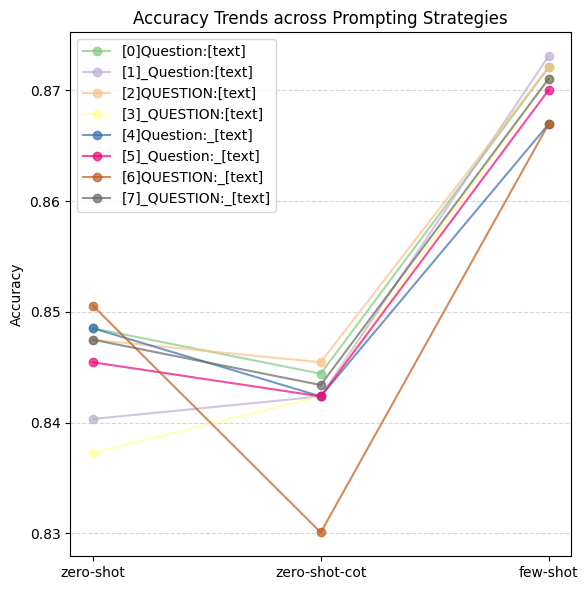

In [104]:
fig, ax = plt.subplots(figsize=(6,6))

# 4) 그래프 그리기 (single model, single dataset)
plot_format_vs_strategy_sub(
    dataset_name=dataset_common,
    model_name=model_gpt,
    prompting_strategy_list=prompting_strategy_list_minimal,
    ax=ax,
    sameaxis=False,  # y축 0~1로 고정
    title="Accuracy Trends across Prompting Strategies",
    xlabel_rotation=0
)

# 5) legend 표시
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="best")
'''
# legend를 그래프 바깥에 배치
ax.legend(handles, labels,
          loc="center left",
          bbox_to_anchor=(1.0, 0.5),  # 그래프 오른쪽 중간
          fontsize="small",
          frameon=False)
'''
# 6) 그래프 보여주기
plt.tight_layout()
plt.savefig("accuracy_gpt_common_leg-format.pdf")
plt.show()

/tmp/ipykernel_1250/4196437651.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Accent")
/tmp/ipykernel_1250/4196437651.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=xlabel_rotation)  # 가독성을 위해 x축 레이블 회전
/tmp/ipykernel_1250/4196437651.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Accent")
/tmp/ipykernel_1250/4196437651.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

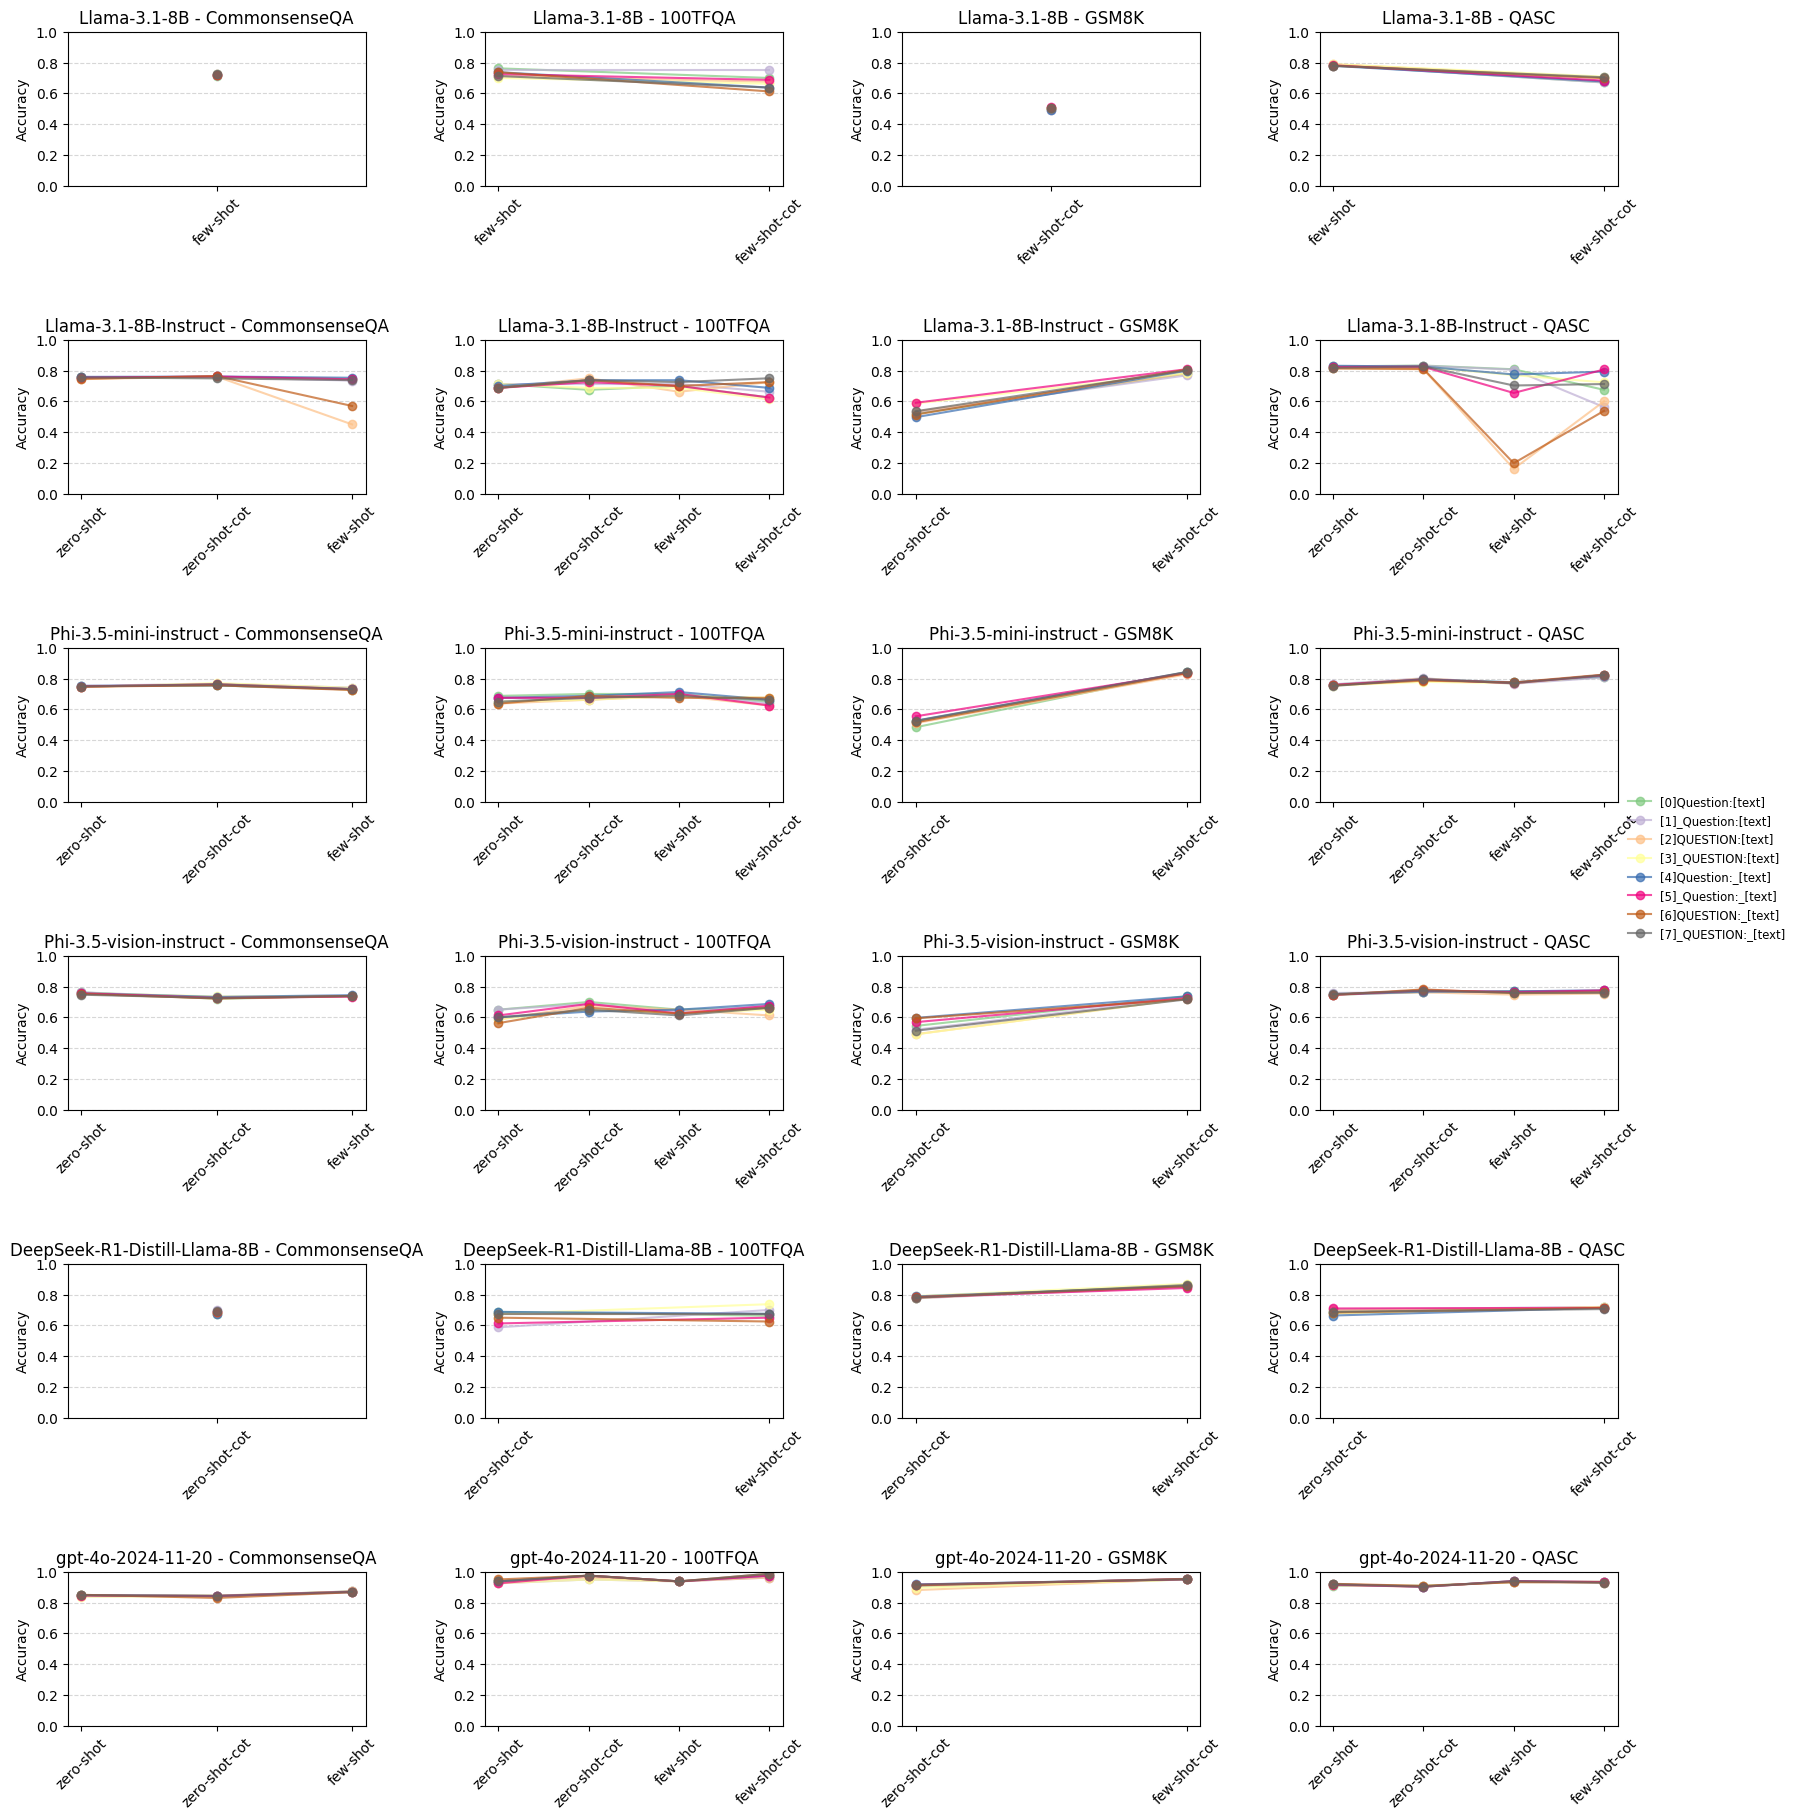

In [105]:

fig, axes = plt.subplots(nrows=len(model_list), ncols=4, figsize=(20, 22))
fig.subplots_adjust(hspace=1.0, wspace=0.4)



for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        ax = axes[i, j]
        if dataset_name == dataset_GSM:
            plot_format_vs_strategy_sub(dataset_name, model_name, prompting_strategy_list_minimal_gsm, ax, sameaxis=True)
        else:
            plot_format_vs_strategy_sub(dataset_name, model_name, prompting_strategy_list_minimal, ax, sameaxis=True)

handles, labels = axes[0, 0].get_legend_handles_labels()
#fig.legend(handles, labels, loc="center right", fontsize="small", ncol=1, frameon=False)
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize="small", ncol=1, frameon=False)
plt.show()



# Consistency

### [ 논문 제출용(appendix 후보) - Consistency Trends across Format ]

/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of t

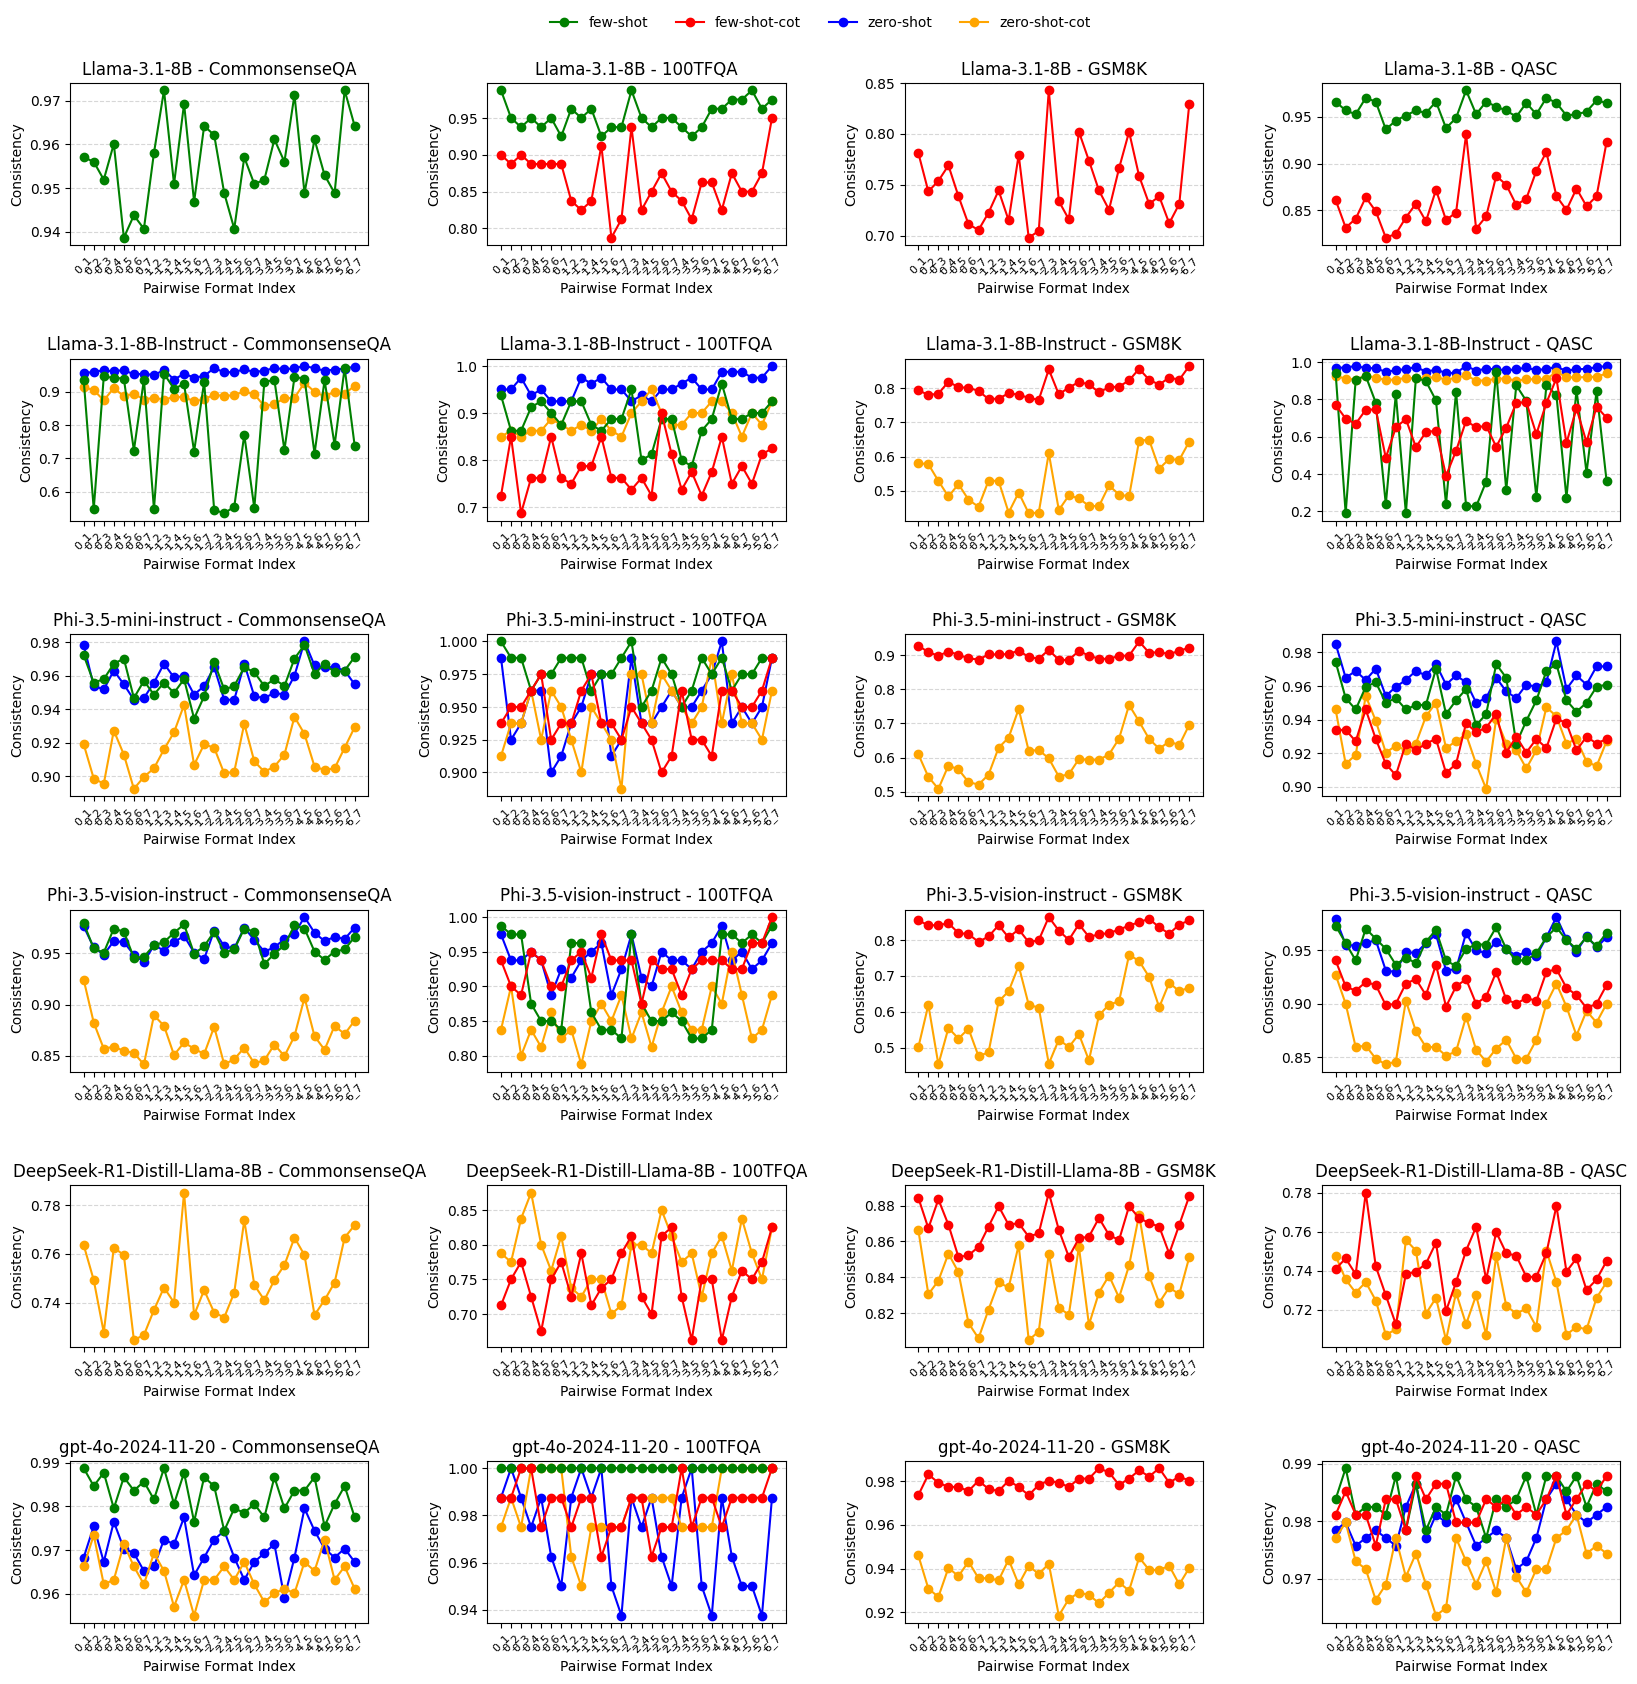

In [106]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

def plot_strategy_consistency_sub(dataset_name, model_name, prompting_strategy_list, ax, sameaxis=False):
    """
    특정 모델과 데이터셋이 주어졌을 때, 각 prompting_strategy별 consistency 변화를 시각화하는 함수.
    """
    NUM_FORMATS = 8  # 0~7번 포맷이 존재
    current_dir = os.getcwd()

    for prompting_strategy in prompting_strategy_list:
        input_path = os.path.join(
            current_dir, f"{result_dir}/{dataset_name}/{model_name}/{prompting_strategy}_score.json"
        )

        # JSON 파일 읽기
        try:
            with open(input_path) as fin:
                model_results = json.load(fin)
        except Exception as e:
            # print(f"Error loading file for {prompting_strategy}: {e}")
            continue  # 오류 발생 시 해당 전략 스킵

        # 📌 Pairwise Consistency 값 저장
        pairwise_consistency_values = []
        x_labels = []

        for i in range(NUM_FORMATS):
            for j in range(i+1, NUM_FORMATS):
                key = f"{i}_{j}"
                if key in model_results["consistency"]:
                    pairwise_consistency_values.append(model_results["consistency"][key])
                    x_labels.append(key)

        # 📌 색상 매핑 (없는 경우 검정색)
        color_for_strategy = COLOR_MAP_STRATEGY.get(prompting_strategy, "black")

        # 📌 각 Prompting Strategy에 대한 꺾은선 그래프 추가
        ax.plot(x_labels, pairwise_consistency_values, marker="o", linestyle="-", label=f"{prompting_strategy}", color=color_for_strategy)

    # 그래프 설정
    ax.set_xlabel("Pairwise Format Index")
    ax.set_ylabel("Consistency")
    ax.set_title(f"{model_name} - {dataset_name}")
    ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
    if sameaxis:
        ax.set_ylim(0, 1)  # y축 범위를 0~1로 고정
    ax.grid(axis="y", linestyle="--", alpha=0.5)

fig, axes = plt.subplots(nrows=len(model_list), ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.7, wspace=0.4)

for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        ax = axes[i, j]
        if dataset_name == dataset_GSM:
            plot_strategy_consistency_sub(dataset_name, model_name, prompting_strategy_list_minimal_gsm, ax)
        else:
            plot_strategy_consistency_sub(dataset_name, model_name, prompting_strategy_list_minimal, ax)

# 📌 legend를 그래프 옆으로 이동하여 간격 조정
handles, labels = [], []
for i in range(len(model_list)):
    for j in range(4):
        h, l = axes[i, j].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

unique_legend = dict(zip(labels, handles))
#fig.legend(unique_legend.values(), unique_legend.keys(), loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize="small", ncol=1, frameon=False)
fig.legend(unique_legend.values(), unique_legend.keys(),
           loc="upper center",
           bbox_to_anchor=(0.5, 0.92),  # x=0.5(중앙), y=0.0(아래)
           ncol=4,
           frameon=False)
plt.savefig("consistency_all_leg-strategy.pdf")
plt.show()



/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of t

/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, fontsize=8)
/tmp/ipykernel_1250/3461696605.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of t

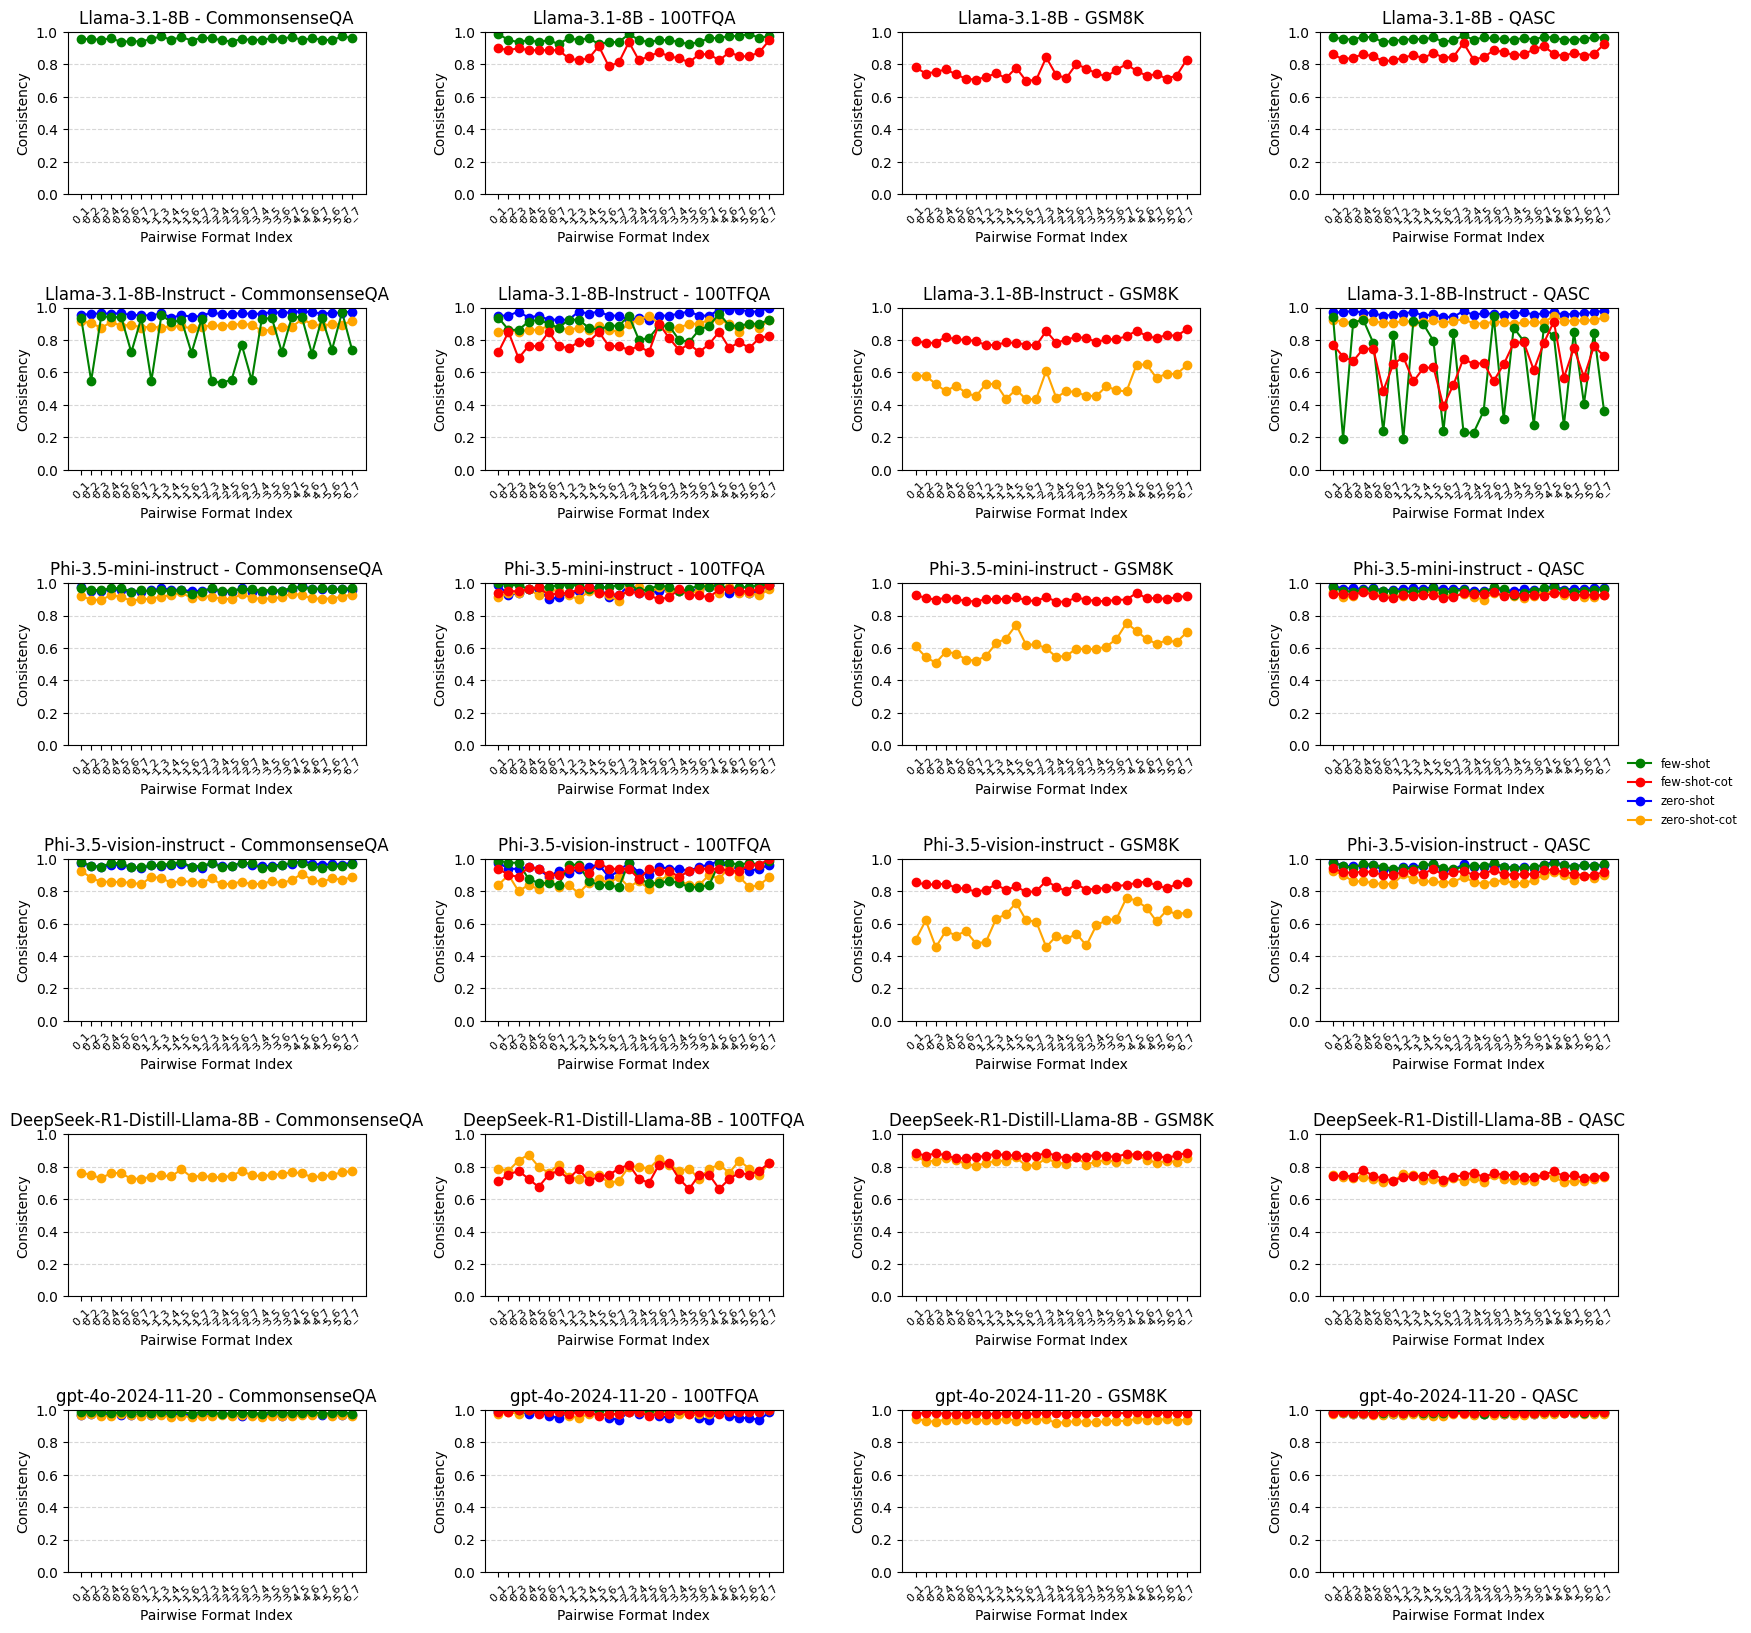

Pairwise consistency analysis across prompting strategies is ready!


In [107]:

fig, axes = plt.subplots(nrows=len(model_list), ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.7, wspace=0.4)

for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        ax = axes[i, j]
        if dataset_name == dataset_GSM:
            plot_strategy_consistency_sub(dataset_name, model_name, prompting_strategy_list_minimal_gsm, ax, sameaxis=True)
        else:
            plot_strategy_consistency_sub(dataset_name, model_name, prompting_strategy_list_minimal, ax, sameaxis=True)

# 📌 legend를 그래프 옆으로 이동하여 간격 조정
handles, labels = [], []
for i in range(3):
    for j in range(4):
        h, l = axes[i, j].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

unique_legend = dict(zip(labels, handles))
fig.legend(unique_legend.values(), unique_legend.keys(), loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize="small", ncol=1, frameon=False)
plt.show()

print("Pairwise consistency analysis across prompting strategies is ready!")

In [108]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

def plot_strategy_consistency2(dataset_name, model_name, prompting_strategy_list, ax, sameaxis=False, title=None, xlabel_rotation=45):
    """
    특정 모델과 데이터셋이 주어졌을 때, 각 Pairwise Format Index별 consistency 변화를 시각화하는 함수.
    """
    NUM_FORMATS = 8  # 0~7번 포맷이 존재
    current_dir = os.getcwd()

    pairwise_consistencies = {}
    valid_strategies = []
    
    for prompting_strategy in prompting_strategy_list:
        input_path = os.path.join(
            current_dir, f"{result_dir}/{dataset_name}/{model_name}/{prompting_strategy}_score.json"
        )

        # JSON 파일 읽기
        try:
            with open(input_path) as fin:
                model_results = json.load(fin)
        except Exception as e:
            # print(f"Error loading file for {prompting_strategy}: {e}")
            continue  # 오류 발생 시 해당 전략 스킵

        # 유효한 strategy 추가
        valid_strategies.append(prompting_strategy)

        # 📌 Pairwise Consistency 값 저장
        for i in range(NUM_FORMATS):
            for j in range(i+1, NUM_FORMATS):
                key = f"{i}_{j}"
                if key not in pairwise_consistencies:
                    pairwise_consistencies[key] = []
                pairwise_consistencies[key].append(model_results["consistency"].get(key, np.nan))
    
    if not valid_strategies:
        print(f"No valid strategies found for {model_name} on {dataset_name}. Skipping plot.")
        return
    
    # 📌 선 그래프 플로팅
    for pairwise_idx, consistency_values in pairwise_consistencies.items():
        if len(consistency_values) == len(valid_strategies):  # 유효한 전략 개수만큼 데이터가 있는 경우만 플로팅
            ax.plot(valid_strategies, consistency_values, marker="o", linestyle="-", label=pairwise_idx)

    # 그래프 설정
    #ax.set_xlabel("Prompting Strategy")
    ax.set_ylabel("Consistency")
    if title is None:
        ax.set_title(f"{model_name} - {dataset_name}")
    else:
        ax.set_title(title)

    ax.set_xticks(range(len(valid_strategies)))
    #ax.set_xticklabels(valid_strategies, rotation=xlabel_rotation, fontsize=8)
    ax.set_xticklabels(valid_strategies, rotation=xlabel_rotation)
    if sameaxis:
        ax.set_ylim(0, 1)  # y축 범위를 0~1로 고정
    ax.grid(axis="y", linestyle="--", alpha=0.5)


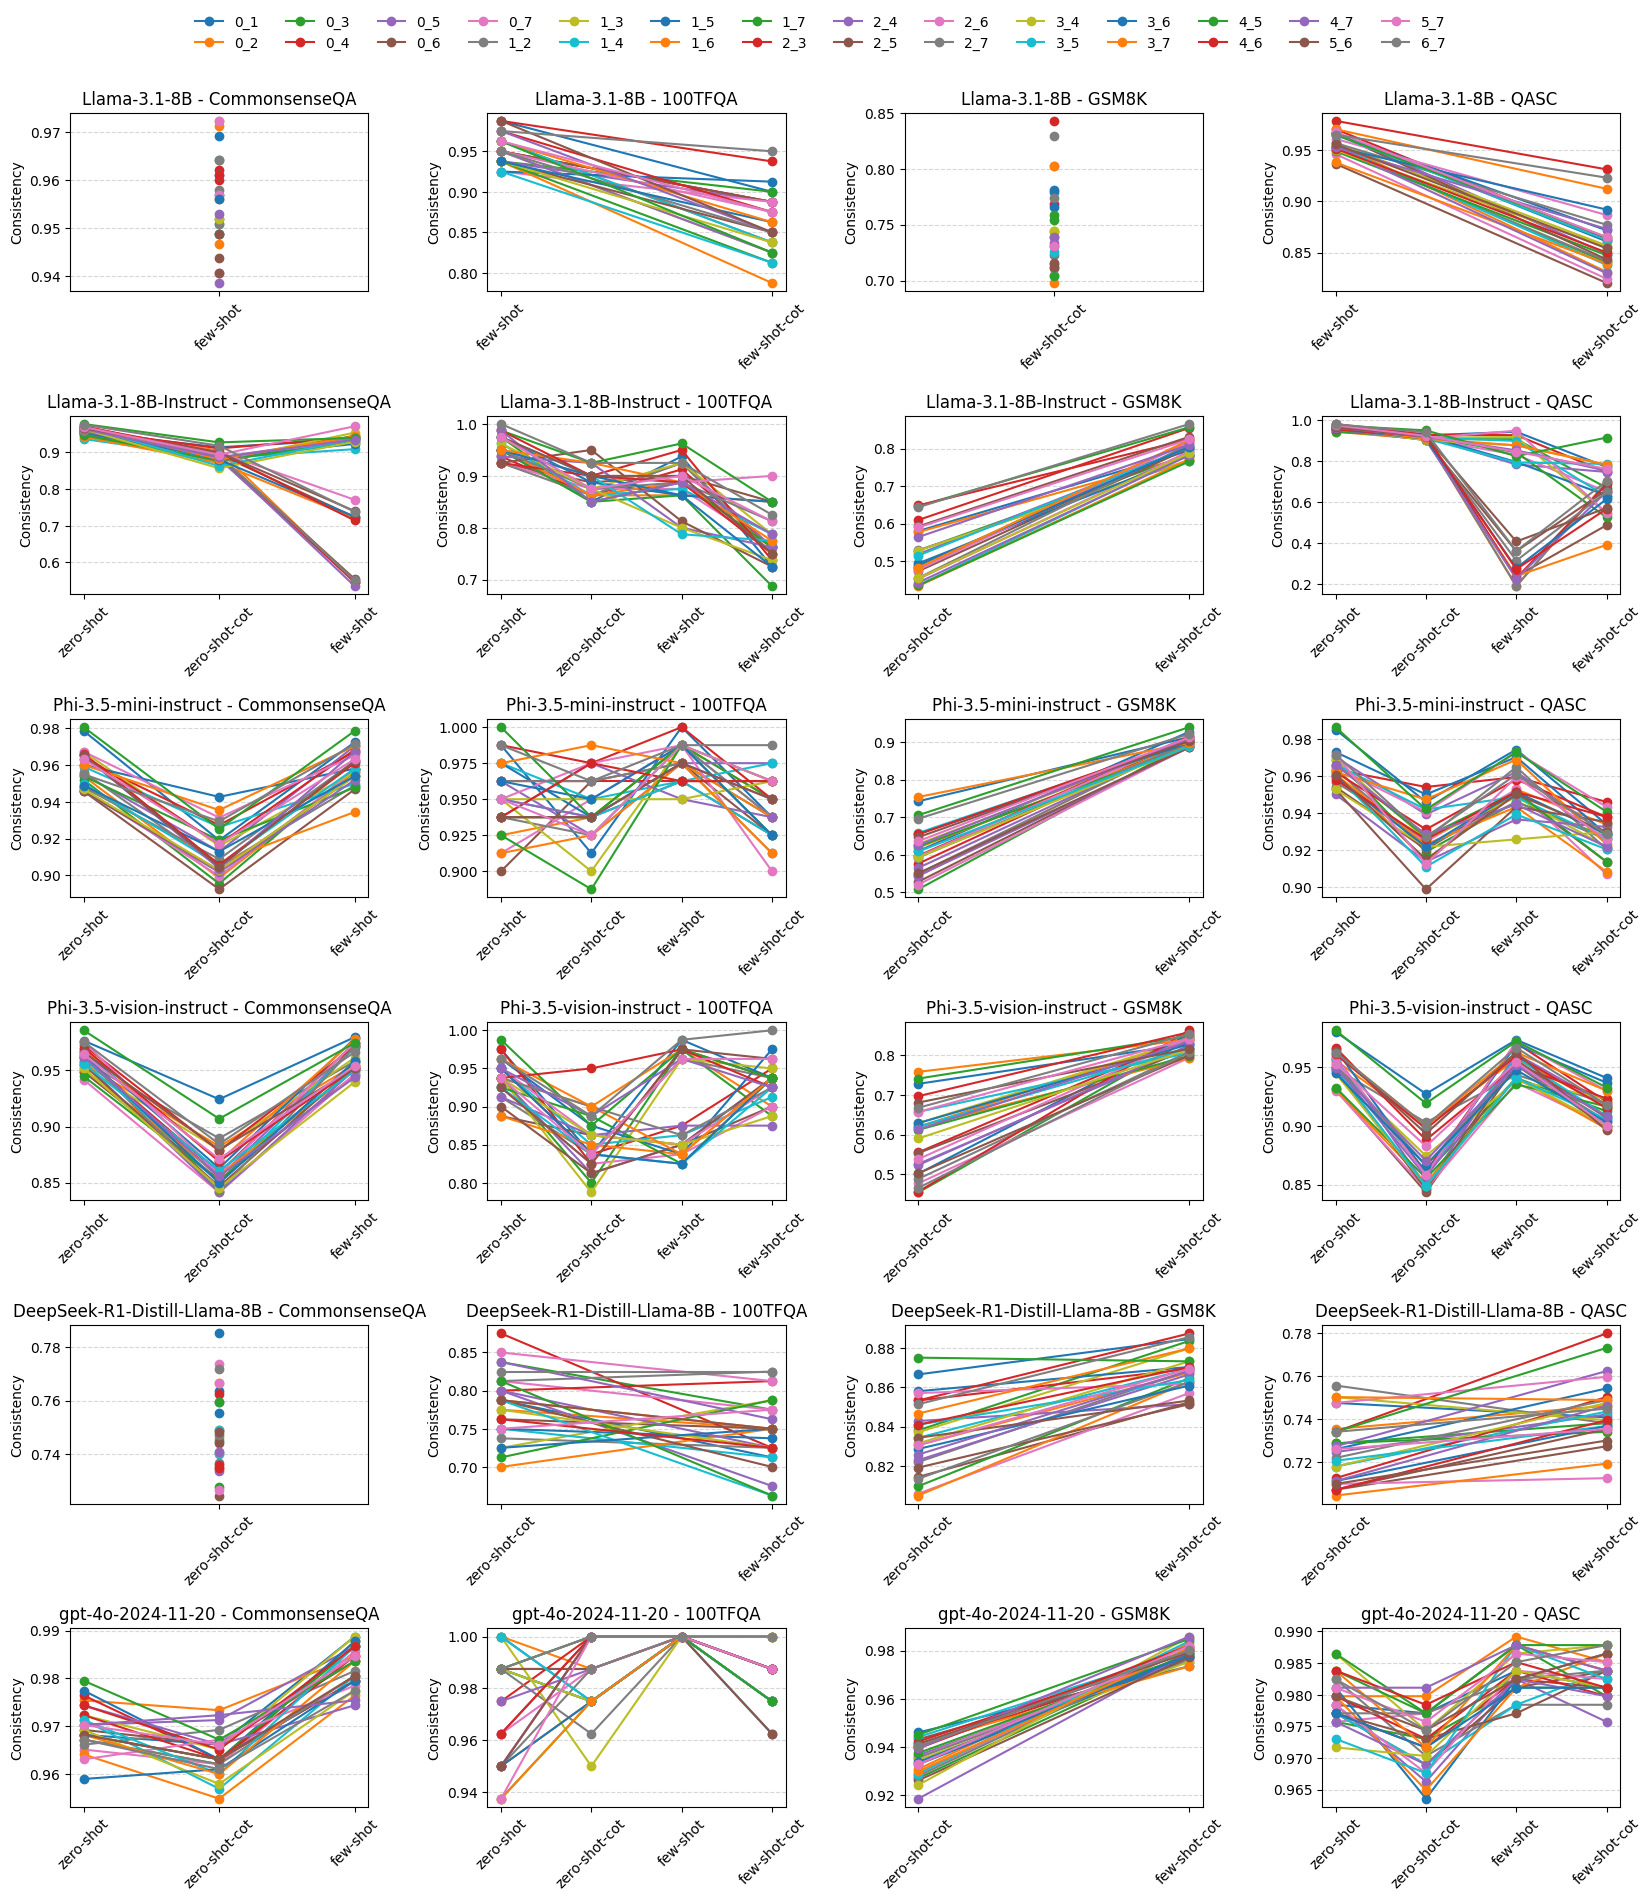

In [109]:

fig, axes = plt.subplots(nrows=len(model_list), ncols=4, figsize=(20, 22))
fig.subplots_adjust(hspace=0.7, wspace=0.4)

for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        ax = axes[i, j]
        if dataset_name == dataset_GSM:
            plot_strategy_consistency2(dataset_name, model_name, prompting_strategy_list_minimal_gsm, ax)
        else:
            plot_strategy_consistency2(dataset_name, model_name, prompting_strategy_list_minimal, ax)

# 📌 legend를 그래프 옆으로 이동하여 간격 조정
handles, labels = [], []
for i in range(len(model_list)):
    for j in range(4):
        h, l = axes[i, j].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

unique_legend = dict(zip(labels, handles))
#fig.legend(unique_legend.values(), unique_legend.keys(), loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize="small", ncol=1, frameon=False)
fig.legend(unique_legend.values(), unique_legend.keys(),
           loc="upper center",
#           bbox_to_anchor=(0.5, 0.07),  # x=0.5(중앙), y=0.0(아래)
            bbox_to_anchor=(0.5, 0.93),  # x=0.5(중앙), y=0.0(아래)
            ncol=14,
           frameon=False)
plt.savefig("consistency_all_leg-format.pdf")

plt.show()

### [ 논문 제출용 - Consistency Trends across Prompting Strategies ]

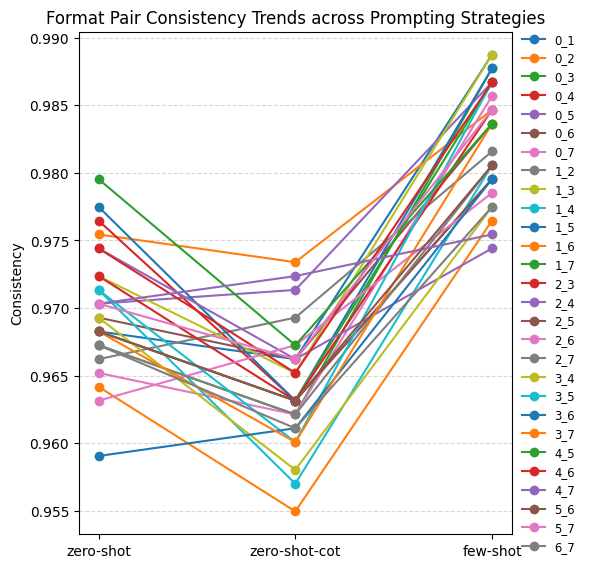

In [110]:
fig, ax = plt.subplots(figsize=(6,6))

# 4) 그래프 그리기 (single model, single dataset)
plot_strategy_consistency2(
    dataset_name=dataset_common,
    model_name=model_gpt,
    prompting_strategy_list=prompting_strategy_list_minimal,
    ax=ax,
    sameaxis=False,  # y축 0~1로 고정
    title="Format Pair Consistency Trends across Prompting Strategies",
    xlabel_rotation=0
)

# 5) legend 표시
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels, loc="best")
# legend를 그래프 바깥에 배치
ax.legend(handles, labels,
          loc="center left",
          bbox_to_anchor=(1.0, 0.48),  # 그래프 오른쪽 중간
          fontsize="small",
          frameon=False)
# 6) 그래프 보여주기
plt.tight_layout()
plt.savefig("consistency_gpt_common_leg-formatpair.pdf")
plt.show()

Consistency 
* llama
    - zero-shot, zero-shot-cot 에서 consistency 가 출렁거림
* llama_instruct
    - Common, QASC : consistency 가 양쪽으로 갈림
    - few-shot 에서 consistency 출렁거림


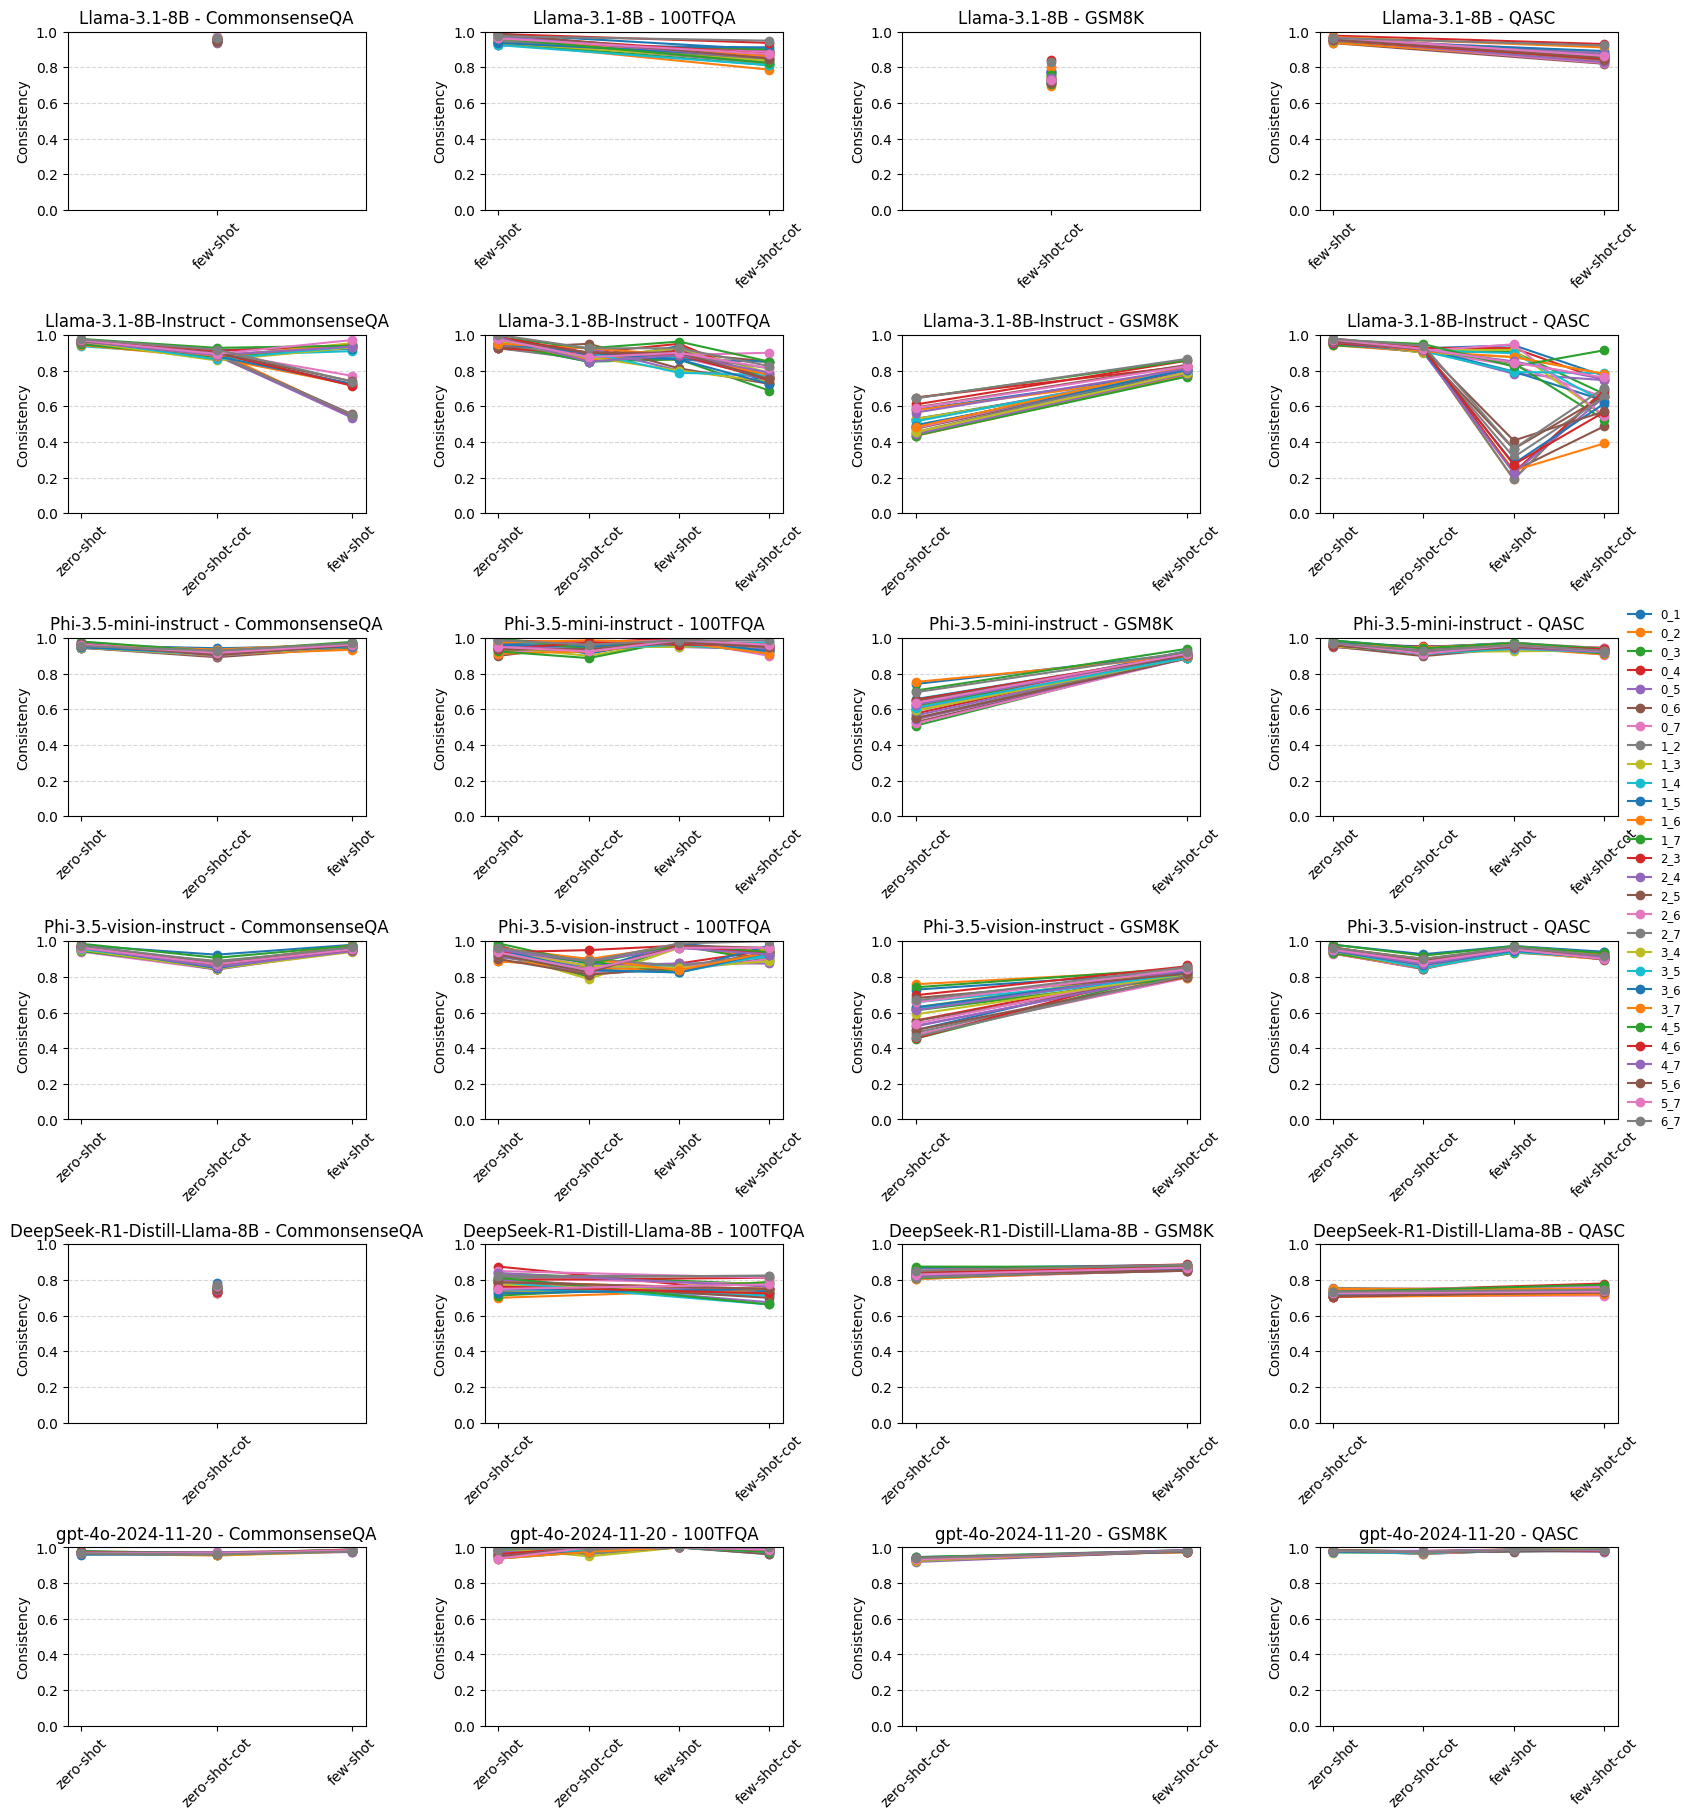

In [111]:

fig, axes = plt.subplots(nrows=len(model_list), ncols=4, figsize=(20, 22))
fig.subplots_adjust(hspace=0.7, wspace=0.4)

for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        ax = axes[i, j]
        if dataset_name == dataset_GSM:
            plot_strategy_consistency2(dataset_name, model_name, prompting_strategy_list_minimal_gsm, ax, sameaxis=True)
        else:
            plot_strategy_consistency2(dataset_name, model_name, prompting_strategy_list_minimal, ax, sameaxis=True)

# 📌 legend를 그래프 옆으로 이동하여 간격 조정
handles, labels = [], []
for i in range(len(model_list)):
    for j in range(4):
        h, l = axes[i, j].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

unique_legend = dict(zip(labels, handles))
fig.legend(unique_legend.values(), unique_legend.keys(), loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize="small", ncol=1, frameon=False)
plt.show()

## Consistency Correlation


In [112]:
import os
import json
import numpy as np
import itertools
import scipy.stats as stats


def correlation_consistency(dataset_name, model_name, prompting_strategy_list):
    """
    특정 (dataset_name, model_name)에 대해,
    여러 prompting_strategy에서 "consistency"에 기록된 28개 포맷쌍(0_1, 0_2, ..., 6_7)의 값을 로드하고,
    모든 (strategy1, strategy2) 쌍에 대해 Pearson/Spearman 상관계수를 구한 뒤,
    Kendall's W(복수 랭커 간 일치도)까지 계산하여,
    결과를 딕셔너리 형태로 리턴해주는 함수.

    - strategy가 1개 이하이면 상관계수를 계산하지 않고 None 반환.
    - 결측치(np.nan) 발견 시, 해당 strategy는 skip.
    - Pearson, Spearman 상관분포에서 평균뿐 아니라 분산/표준편차, 최소/최대도 함께 계산.
    - Kendall's W(Kendall의 계수, Coefficient of Concordance)는 k명의 랭커가 N개 아이템에 대해 매긴 순위 일치도.
      여기서는 k = 유효한 strategy 수, N = 28 (포맷쌍 개수).
    """

    NUM_FORMATS = 8
    # 포맷쌍 (i_j) 리스트를 사전에 정의: 총 28개
    pair_keys = []
    for i in range(NUM_FORMATS):
        for j in range(i+1, NUM_FORMATS):
            pair_keys.append(f"{i}_{j}")

    current_dir = os.getcwd()

    # 전략별 consistency 저장: data[strategy] = 28개 (각 i_j에 대한 consistency)
    data = {}

    for prompting_strategy in prompting_strategy_list:
        input_path = os.path.join(
            current_dir,
            f"{result_dir}/{dataset_name}/{model_name}/{prompting_strategy}_score.json"
        )
        try:
            with open(input_path) as fin:
                model_results = json.load(fin)
        except Exception as e:
            # print(f"[Error]{prompting_strategy}: {e}")
            continue

        consistency_list = []
        found_nan = False
        for pk in pair_keys:
            val = model_results["consistency"].get(pk, np.nan)
            if np.isnan(val):
                print(f"[WARNING] NaN found => skip strategy: "
                      f"dataset={dataset_name}, model={model_name}, "
                      f"strategy={prompting_strategy}, pair={pk}")
                found_nan = True
                break
            consistency_list.append(val)

        # 📌 하나라도 NaN이면 해당 전략 skip
        if found_nan:
            continue

        data[prompting_strategy] = consistency_list

    # 유효 전략
    strategies = list(data.keys())
    if len(strategies) < 2:
        print(f"[{dataset_name} - {model_name}] Valid strategies < 2. Skip correlation.")
        return None

    # (1) pairwise 상관관계 계산
    pearson_corrs, pearson_ps = [], []
    spearman_corrs, spearman_ps = [], []
    pairwise_results = []

    strategy_pairs = list(itertools.combinations(strategies, 2))
    for s1, s2 in strategy_pairs:
        X = data[s1]  # 28 길이
        Y = data[s2]
        # Pearson
        pearson_corr, pearson_p = stats.pearsonr(X, Y)
        # Spearman
        spearman_corr, spearman_p = stats.spearmanr(X, Y)

        pearson_corrs.append(pearson_corr)
        pearson_ps.append(pearson_p)
        spearman_corrs.append(spearman_corr)
        spearman_ps.append(spearman_p)

        pairwise_results.append({
            "pair": (s1, s2),
            "pearson_corr": pearson_corr,
            "pearson_p": pearson_p,
            "spearman_corr": spearman_corr,
            "spearman_p": spearman_p
        })

    # (2) 통계량 계산 (평균, 분산, 표준편차, 최소, 최대)
    # Pearson
    pearson_mean = np.nanmean(pearson_corrs)
    pearson_var = np.nanvar(pearson_corrs)
    pearson_std = np.nanstd(pearson_corrs)
    pearson_min_idx = np.nanargmin(pearson_corrs)
    pearson_max_idx = np.nanargmax(pearson_corrs)

    # Spearman
    spearman_mean = np.nanmean(spearman_corrs)
    spearman_var = np.nanvar(spearman_corrs)
    spearman_std = np.nanstd(spearman_corrs)
    spearman_min_idx = np.nanargmin(spearman_corrs)
    spearman_max_idx = np.nanargmax(spearman_corrs)

    # (3) Kendall's W 계산
    #  - k = # of strategies
    #  - N = 28 (pair_keys 수)
    data_matrix = []  # shape(k, 28)
    for s in strategies:
        data_matrix.append(data[s])
    data_matrix = np.array(data_matrix)

    k, N = data_matrix.shape
    if k < 2 or N < 2:
        kendalls_w = np.nan
    else:
        # 각 행별 argsort -> 1-based rank
        ranked_data = np.argsort(np.argsort(data_matrix, axis=1), axis=1) + 1
        # 각 column별 rank 합
        R = np.sum(ranked_data, axis=0)
        R_mean = np.mean(R)
        S = np.sum((R - R_mean)**2)
        # W = (12 * S) / [k^2 * (N^3 - N)]
        kendalls_w = (12.0 * S) / (k**2 * (N**3 - N))

    summary = {
        "pearson_mean": pearson_mean,
        "pearson_var": pearson_var,
        "pearson_std": pearson_std,
        "pearson_min": (pearson_corrs[pearson_min_idx], pearson_ps[pearson_min_idx]),
        "pearson_max": (pearson_corrs[pearson_max_idx], pearson_ps[pearson_max_idx]),

        "spearman_mean": spearman_mean,
        "spearman_var": spearman_var,
        "spearman_std": spearman_std,
        "spearman_min": (spearman_corrs[spearman_min_idx], spearman_ps[spearman_min_idx]),
        "spearman_max": (spearman_corrs[spearman_max_idx], spearman_ps[spearman_max_idx]),

        "kendalls_w": kendalls_w
    }

    results_dict = {
        "dataset": dataset_name,
        "model": model_name,
        "strategies": strategies,
        "pairwise_results": pairwise_results,
        "summary": summary
    }

    return results_dict


In [113]:

for i, model_name in enumerate(model_list):
    for j, dataset_name in enumerate(dataset_list):
        if dataset_name == dataset_GSM:
            results = correlation_consistency(dataset_name, model_name, prompting_strategy_list_minimal_gsm)
        else:
            results = correlation_consistency(dataset_name, model_name, prompting_strategy_list_minimal)

    
    if results is not None:
        print(f"===== {model_name} - {dataset_name} =====")
        for item in results["pairwise_results"]:
            s1, s2 = item["pair"]
            print(f"Strategies: ({s1}, {s2})")
            print(f"  Pearson:  r={item['pearson_corr']:.4f}, p={item['pearson_p']:.4f}")
            print(f"  Spearman: r={item['spearman_corr']:.4f}, p={item['spearman_p']:.4f}")
            print()

        print("===== Summary =====")
        summary = results["summary"]
        print(f"Pearson mean = {summary['pearson_mean']:.4f}")
        print(f"Pearson var = {summary['pearson_var']:.4f}")
        print(f"Pearson std = {summary['pearson_std']:.4f}")
        print(f"Pearson min  = {summary['pearson_min'][0]:.4f} (p={summary['pearson_min'][1]:.4f})")
        print(f"Pearson max  = {summary['pearson_max'][0]:.4f} (p={summary['pearson_max'][1]:.4f})\n")

        print(f"Spearman mean = {summary['spearman_mean']:.4f}")
        print(f"Spearman var  = {summary['spearman_var']:.4f}")
        print(f"Spearman std  = {summary['spearman_std']:.4f}")
        print(f"Spearman min  = {summary['spearman_min'][0]:.4f} (p={summary['spearman_min'][1]:.4f})")
        print(f"Spearman max  = {summary['spearman_max'][0]:.4f} (p={summary['spearman_max'][1]:.4f})\n")

        print(f"Kendall's W = {summary['kendalls_w']:.4f}")

        print("Done.")
    else:
        print("No correlation computed.")


[CommonsenseQA - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
[GSM8K - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
===== Llama-3.1-8B - QASC =====
Strategies: (few-shot, few-shot-cot)
  Pearson:  r=0.6464, p=0.0002
  Spearman: r=0.6085, p=0.0006

===== Summary =====
Pearson mean = 0.6464
Pearson var = 0.0000
Pearson std = 0.0000
Pearson min  = 0.6464 (p=0.0002)
Pearson max  = 0.6464 (p=0.0002)

Spearman mean = 0.6085
Spearman var  = 0.0000
Spearman std  = 0.0000
Spearman min  = 0.6085 (p=0.0006)
Spearman max  = 0.6085 (p=0.0006)

Kendall's W = 0.8019
Done.
===== Llama-3.1-8B-Instruct - QASC =====
Strategies: (zero-shot, zero-shot-cot)
  Pearson:  r=0.4563, p=0.0147
  Spearman: r=0.4347, p=0.0208

Strategies: (zero-shot, few-shot)
  Pearson:  r=0.2087, p=0.2866
  Spearman: r=0.2272, p=0.2448

Strategies: (zero-shot, few-shot-cot)
  Pearson:  r=0.6263, p=0.0004
  Spearman: r=0.6091, p=0.0006

Strategies: (zero-shot-cot, few-shot)
  Pearson:  r=0.1227, p=0.5339
  Spearm

/tmp/ipykernel_1250/2981232728.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = stats.pearsonr(X, Y)
/tmp/ipykernel_1250/2981232728.py:83: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p = stats.spearmanr(X, Y)


In [114]:
summary_rows = []

for model_name in model_list:
    for dataset_name in dataset_list:
        if dataset_name == dataset_GSM:
            results = correlation_consistency(dataset_name, model_name, prompting_strategy_list_minimal_gsm)
        else:
            results = correlation_consistency(dataset_name, model_name, prompting_strategy_list_minimal)

        if results is not None:
            summ = results["summary"]
            summary_rows.append({
                "model": model_name,
                "dataset": dataset_name,
                "pearson_mean": summ["pearson_mean"],
                "pearson_var": summ["pearson_var"],
                "pearson_std": summ["pearson_std"],
                "pearson_min": summ["pearson_min"],
                "pearson_max": summ["pearson_max"],
                "spearman_mean": summ["spearman_mean"],
                "spearman_var": summ["spearman_var"],
                "spearman_std": summ["spearman_std"],
                "spearman_min": summ["spearman_min"],
                "spearman_max": summ["spearman_max"],
                "kendalls_w": summ["kendalls_w"]
            })

[CommonsenseQA - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
[GSM8K - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
[CommonsenseQA - DeepSeek-R1-Distill-Llama-8B] Valid strategies < 2. Skip correlation.


/tmp/ipykernel_1250/2981232728.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = stats.pearsonr(X, Y)
/tmp/ipykernel_1250/2981232728.py:83: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p = stats.spearmanr(X, Y)


In [115]:
print(r"\begin{table}[ht]")
print(r"\centering")
print(r"\begin{tabular}{llrrrrrrr}")
print(r"\toprule")
print(r"Model & Dataset & \multicolumn{3}{c}{Pearson} & \multicolumn{3}{c}{Spearman} & \multicolumn{1}{c}{Kendall's W} \\")
print(r" & & Mean & Var(Std) & (Min,Max) & Mean & Var(Std) & (Min,Max) & Value \\")
print(r"\midrule")

for row in summary_rows:
    model_name = row["model"]
    dataset_name = row["dataset"]
    
    pearson_mean = row["pearson_mean"]
    pearson_var = row["pearson_var"]
    pearson_std = row["pearson_std"]
    pm_corr_min, pm_p_min = row["pearson_min"]
    pm_corr_max, pm_p_max = row["pearson_max"]

    spearman_mean = row["spearman_mean"]
    spearman_var = row["spearman_var"]
    spearman_std = row["spearman_std"]
    sm_corr_min, sm_p_min = row["spearman_min"]
    sm_corr_max, sm_p_max = row["spearman_max"]

    # Kendall's W
    kendalls_w = row["kendalls_w"]

    line = (
        f"{model_name} & {dataset_name} & "
        f"{pearson_mean:.3f} & "
        f"{pearson_var:.3f}({pearson_std:.3f}) & "
        f"({pm_corr_min:.3f},{pm_corr_max:.3f}) & "
        f"{spearman_mean:.3f} & "
        f"{spearman_var:.3f}({spearman_std:.3f}) & "
        f"({sm_corr_min:.3f},{sm_corr_max:.3f}) & "
        f"{kendalls_w:.3f} "
        r"\\"
    )
    print(line)

print(r"\bottomrule")
print(r"\end{tabular}")
print(r"\caption{Consistancy : Pairwise correlation among strategies (Pearson, Spearman, and Kendall's W).}")
print(r"\label{tab:consistancy-correlation-summary}")
print(r"\end{table}")


\begin{table}[ht]
\centering
\begin{tabular}{llrrrrrrr}
\toprule
Model & Dataset & \multicolumn{3}{c}{Pearson} & \multicolumn{3}{c}{Spearman} & \multicolumn{1}{c}{Kendall's W} \\
 & & Mean & Var(Std) & (Min,Max) & Mean & Var(Std) & (Min,Max) & Value \\
\midrule
Llama-3.1-8B & 100TFQA & 0.283 & 0.000(0.000) & (0.283,0.283) & 0.180 & 0.000(0.000) & (0.180,0.180) & 0.575 \\
Llama-3.1-8B & QASC & 0.646 & 0.000(0.000) & (0.646,0.646) & 0.608 & 0.000(0.000) & (0.608,0.608) & 0.802 \\
Llama-3.1-8B-Instruct & CommonsenseQA & 0.078 & 0.037(0.192) & (-0.155,0.315) & 0.117 & 0.042(0.204) & (-0.171,0.277) & 0.407 \\
Llama-3.1-8B-Instruct & 100TFQA & 0.070 & 0.018(0.134) & (-0.197,0.193) & 0.079 & 0.012(0.111) & (-0.097,0.263) & 0.343 \\
Llama-3.1-8B-Instruct & GSM8K & 0.650 & 0.000(0.000) & (0.650,0.650) & 0.532 & 0.000(0.000) & (0.532,0.532) & 0.765 \\
Llama-3.1-8B-Instruct & QASC & 0.366 & 0.027(0.164) & (0.123,0.626) & 0.313 & 0.025(0.160) & (0.143,0.609) & 0.484 \\
Phi-3.5-mini-instruct & Comm

### [ 논문 제출용 - Consistency : Correlation latex - spearman ]

In [116]:
print(r"\begin{table}[ht]")
print(r"\centering")
print(r"\begin{tabular}{llrrrrrrr}")
print(r"\toprule")
print(r"Model & Dataset & \multicolumn{3}{c}{Spearman}  \\")
print(r" & & Mean & Var & (Min,Max) \\")
print(r"\midrule")

for row in summary_rows:
    model_name = row["model"]
    dataset_name = row["dataset"]
    
    spearman_mean = row["spearman_mean"]
    spearman_var = row["spearman_var"]
    sm_corr_min, sm_p_min = row["spearman_min"]
    sm_corr_max, sm_p_max = row["spearman_max"]

    
    line = (
        f"{model_name} & {dataset_name} & "
        f"{spearman_mean:.3f} & "
        f"{spearman_var:.3f} & "
        f"({sm_corr_min:.3f},{sm_corr_max:.3f}) "
        r"\\"
    )
    print(line)

print(r"\bottomrule")
print(r"\end{tabular}")
print(r"\caption{Consistency : Pairwise Pearson correlation among strategies}")
print(r"\label{tab:correlation-summary}")
print(r"\end{table}")


\begin{table}[ht]
\centering
\begin{tabular}{llrrrrrrr}
\toprule
Model & Dataset & \multicolumn{3}{c}{Spearman}  \\
 & & Mean & Var & (Min,Max) \\
\midrule
Llama-3.1-8B & 100TFQA & 0.180 & 0.000 & (0.180,0.180) \\
Llama-3.1-8B & QASC & 0.608 & 0.000 & (0.608,0.608) \\
Llama-3.1-8B-Instruct & CommonsenseQA & 0.117 & 0.042 & (-0.171,0.277) \\
Llama-3.1-8B-Instruct & 100TFQA & 0.079 & 0.012 & (-0.097,0.263) \\
Llama-3.1-8B-Instruct & GSM8K & 0.532 & 0.000 & (0.532,0.532) \\
Llama-3.1-8B-Instruct & QASC & 0.313 & 0.025 & (0.143,0.609) \\
Phi-3.5-mini-instruct & CommonsenseQA & 0.566 & 0.004 & (0.483,0.633) \\
Phi-3.5-mini-instruct & 100TFQA & 0.019 & 0.041 & (-0.304,0.273) \\
Phi-3.5-mini-instruct & GSM8K & 0.464 & 0.000 & (0.464,0.464) \\
Phi-3.5-mini-instruct & QASC & 0.382 & 0.039 & (0.093,0.655) \\
Phi-3.5-vision-instruct & CommonsenseQA & 0.551 & 0.010 & (0.427,0.670) \\
Phi-3.5-vision-instruct & 100TFQA & 0.133 & 0.031 & (-0.161,0.334) \\
Phi-3.5-vision-instruct & GSM8K & 0.205 & 0.0

In [117]:
print("[Consistency Correlation-spearman]")
print( "Model,Dataset,Mean,Var,Min,Max")

for row in summary_rows:
    model_name = row["model"]
    dataset_name = row["dataset"]
    
    spearman_mean = row["spearman_mean"]
    spearman_var = row["spearman_var"]
    sm_corr_min, sm_p_min = row["spearman_min"]
    sm_corr_max, sm_p_max = row["spearman_max"]

    
    line = (
        f"{model_name},{dataset_name},{spearman_mean:.3f},{spearman_var:.3f},{sm_corr_min:.3f},{sm_corr_max:.3f}"
    )
    print(line)


[Consistency Correlation-spearman]
Model,Dataset,Mean,Var,Min,Max
Llama-3.1-8B,100TFQA,0.180,0.000,0.180,0.180
Llama-3.1-8B,QASC,0.608,0.000,0.608,0.608
Llama-3.1-8B-Instruct,CommonsenseQA,0.117,0.042,-0.171,0.277
Llama-3.1-8B-Instruct,100TFQA,0.079,0.012,-0.097,0.263
Llama-3.1-8B-Instruct,GSM8K,0.532,0.000,0.532,0.532
Llama-3.1-8B-Instruct,QASC,0.313,0.025,0.143,0.609
Phi-3.5-mini-instruct,CommonsenseQA,0.566,0.004,0.483,0.633
Phi-3.5-mini-instruct,100TFQA,0.019,0.041,-0.304,0.273
Phi-3.5-mini-instruct,GSM8K,0.464,0.000,0.464,0.464
Phi-3.5-mini-instruct,QASC,0.382,0.039,0.093,0.655
Phi-3.5-vision-instruct,CommonsenseQA,0.551,0.010,0.427,0.670
Phi-3.5-vision-instruct,100TFQA,0.133,0.031,-0.161,0.334
Phi-3.5-vision-instruct,GSM8K,0.205,0.000,0.205,0.205
Phi-3.5-vision-instruct,QASC,0.592,0.015,0.446,0.817
DeepSeek-R1-Distill-Llama-8B,100TFQA,0.113,0.000,0.113,0.113
DeepSeek-R1-Distill-Llama-8B,GSM8K,0.574,0.000,0.574,0.574
DeepSeek-R1-Distill-Llama-8B,QASC,0.481,0.000,0.481,0.481
gpt-4o

[CommonsenseQA - Llama-3.1-8B] Valid strategies < 2. Skip correlation.


[GSM8K - Llama-3.1-8B] Valid strategies < 2. Skip correlation.
[CommonsenseQA - DeepSeek-R1-Distill-Llama-8B] Valid strategies < 2. Skip correlation.


/tmp/ipykernel_1250/2981232728.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p = stats.pearsonr(X, Y)
/tmp/ipykernel_1250/2981232728.py:83: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p = stats.spearmanr(X, Y)


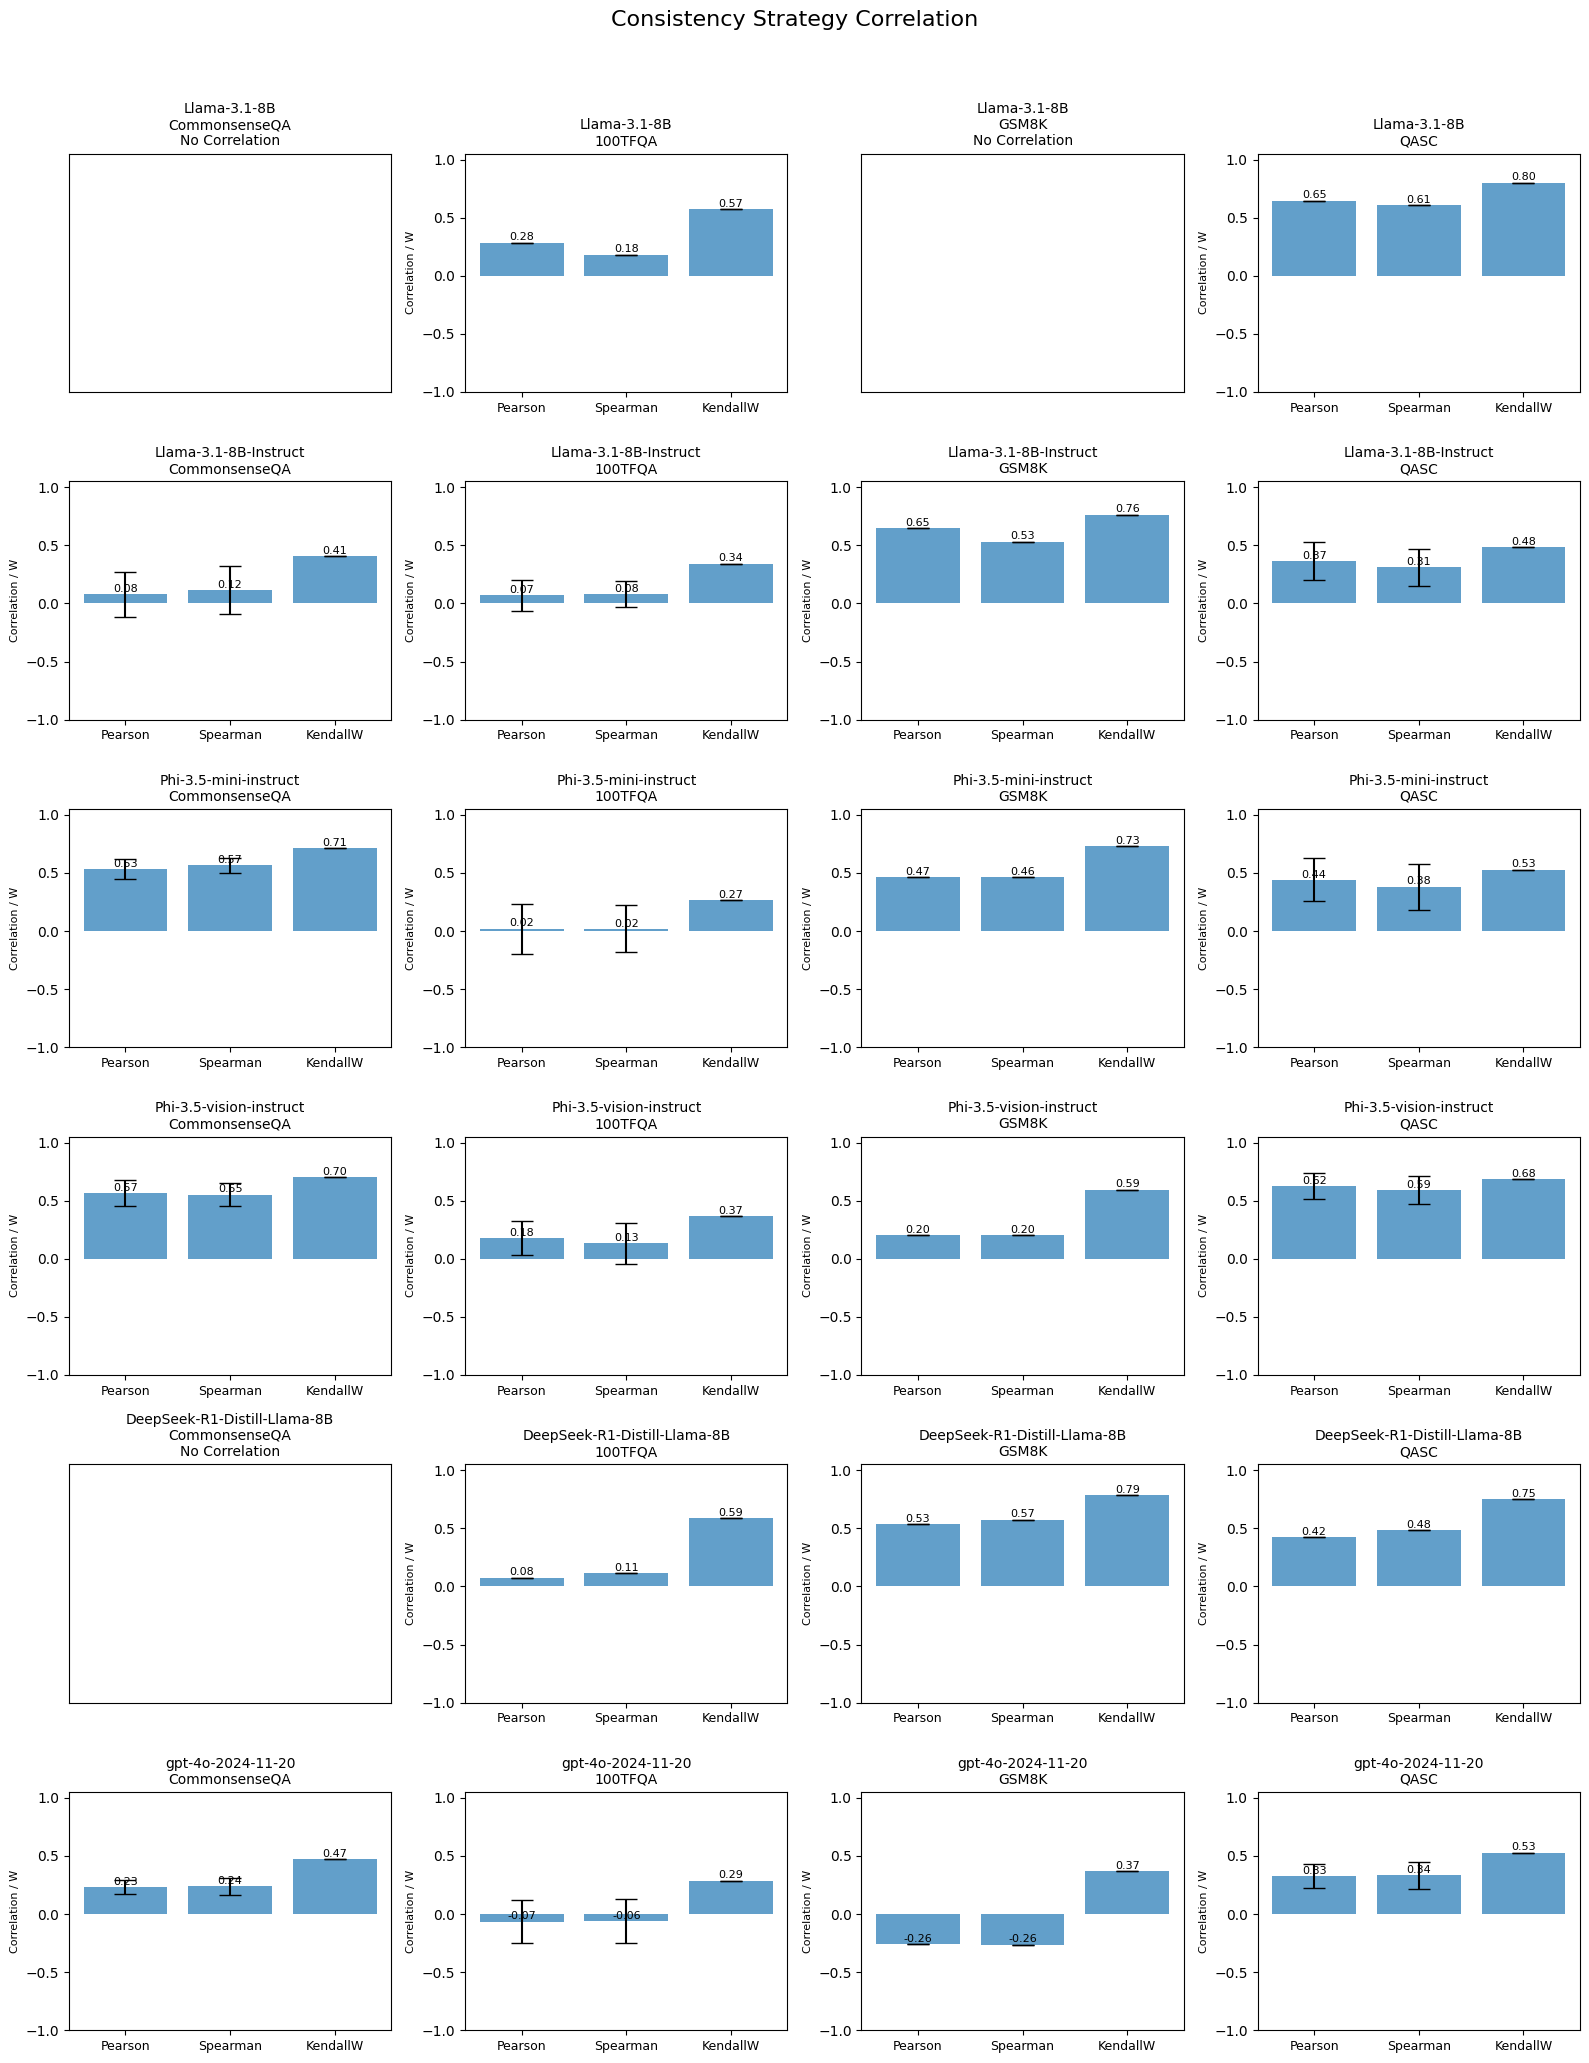

In [118]:
prompting_strategy_list_minimal = ["zero-shot", "zero-shot-cot", "few-shot", "few-shot-cot"]
prompting_strategy_list_minimal_gsm = ["zero-shot-cot", "few-shot-cot"]

# 메인 함수 실행
plot_all_correlations(
    model_list,
    dataset_list,
    prompting_strategy_list_minimal,
    prompting_strategy_list_minimal_gsm,
    is_consistancy=True
)